In [4]:
# INSTALLS AND IMPORTS
if (!require("ggplot2")) install.packages("ggplot2")
if (!require("dplyr")) install.packages("dplyr")
if (!require("corrplot")) install.packages("corrplot")
if (!require("pROC")) install.packages("pROC")
if (!require("neuralnet")) install.packages("neuralnet")
if (!require("rsample")) install.packages("rsample")
if (!require("caret")) install.packages("caret")

In [5]:
library(ggplot2)
library(dplyr)
library(MASS)
library(corrplot)
library(pROC)
library(neuralnet)
library(rsample)
library(caret)

options(repr.plot.width=20, repr.plot.height=8)
options(warn=-1)


In [6]:
# reading the data set and taking a look at the preview
approval_ds <- read.csv("credit_dataset.csv")
head(approval_ds, n=10)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
,<int>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>
1,1,30.83,0.000,1,1,Industrials,White,1.250,1,1,1,0,ByBirth,202,0,1
2,0,58.67,4.460,1,1,Materials,Black,3.040,1,1,6,0,ByBirth,43,560,1
3,0,24.50,0.500,1,1,Materials,Black,1.500,1,0,0,0,ByBirth,280,824,1
4,1,27.83,1.540,1,1,Industrials,White,3.750,1,1,5,1,ByBirth,100,3,1
5,1,20.17,5.625,1,1,Industrials,White,1.710,1,0,0,0,ByOtherMeans,120,0,1
6,1,32.08,4.000,1,1,CommunicationServices,White,2.500,1,0,0,1,ByBirth,360,0,1
7,1,33.17,1.040,1,1,Transport,Black,6.500,1,0,0,1,ByBirth,164,31285,1
8,0,22.92,11.585,1,1,InformationTechnology,White,0.040,1,0,0,0,ByBirth,80,1349,1
9,1,54.42,0.500,0,0,Financials,Black,3.960,1,0,0,0,ByBirth,180,314,1


In [7]:
# taking a look at the summary of data
summary(approval_ds)

     Gender            Age             Debt           Married      
 Min.   :0.0000   Min.   :13.75   Min.   : 0.000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:22.67   1st Qu.: 1.000   1st Qu.:1.0000  
 Median :1.0000   Median :28.46   Median : 2.750   Median :1.0000  
 Mean   :0.6957   Mean   :31.51   Mean   : 4.759   Mean   :0.7609  
 3rd Qu.:1.0000   3rd Qu.:37.71   3rd Qu.: 7.207   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :80.25   Max.   :28.000   Max.   :1.0000  
  BankCustomer      Industry          Ethnicity         YearsEmployed   
 Min.   :0.0000   Length:690         Length:690         Min.   : 0.000  
 1st Qu.:1.0000   Class :character   Class :character   1st Qu.: 0.165  
 Median :1.0000   Mode  :character   Mode  :character   Median : 1.000  
 Mean   :0.7638                                         Mean   : 2.223  
 3rd Qu.:1.0000                                         3rd Qu.: 2.625  
 Max.   :1.0000                                         Max.   :28.500  
  PriorDefaul

In [8]:
# checking if missing values exist
paste0("Gender: Null values - ",sum(is.na(approval_ds$Gender)))
paste0("Age: Null values - ",sum(is.na(approval_ds$Age)))
paste0("Debt: Null values - ",sum(is.na(approval_ds$Debt)))
paste0("Married: Null values - ",sum(is.na(approval_ds$Married)))
paste0("BankCustomer: Null values - ",sum(is.na(approval_ds$BankCustomer)))
paste0("Industry: Null values - ",sum(is.na(approval_ds$Industry)))
paste0("Ethnicity: Null values - ",sum(is.na(approval_ds$Ethnicity)))
paste0("YearsEmployed: Null values - ",sum(is.na(approval_ds$YearsEmployed)))
paste0("PriorDefault: Null values - ",sum(is.na(approval_ds$PriorDefault)))
paste0("Employed: Null values - ",sum(is.na(approval_ds$Employed)))
paste0("CreditScore: Null values - ",sum(is.na(approval_ds$CreditScore)))
paste0("DriversLicense: Null values - ",sum(is.na(approval_ds$DriversLicense)))
paste0("Citizen: Null values - ",sum(is.na(approval_ds$Citizen)))
paste0("ZipCode: Null values - ",sum(is.na(approval_ds$ZipCode)))
paste0("Income: Null values - ",sum(is.na(approval_ds$Income)))
paste0("Approved: Null values - ",sum(is.na(approval_ds$Approved)))

[1] "Gender: Null values - 0"

[1] "Age: Null values - 0"

[1] "Debt: Null values - 0"

[1] "Married: Null values - 0"

[1] "BankCustomer: Null values - 0"

[1] "Industry: Null values - 0"

[1] "Ethnicity: Null values - 0"

[1] "YearsEmployed: Null values - 0"

[1] "PriorDefault: Null values - 0"

[1] "Employed: Null values - 0"

[1] "CreditScore: Null values - 0"

[1] "DriversLicense: Null values - 0"

[1] "Citizen: Null values - 0"

[1] "ZipCode: Null values - 0"

[1] "Income: Null values - 0"

[1] "Approved: Null values - 0"

####   We can clearly see that there are not missing values in both dependent and independent variables to we dont have to perform data imputation

# Exploratory Data Analysis
----

### How income and credit score are varying with respect to credit approval

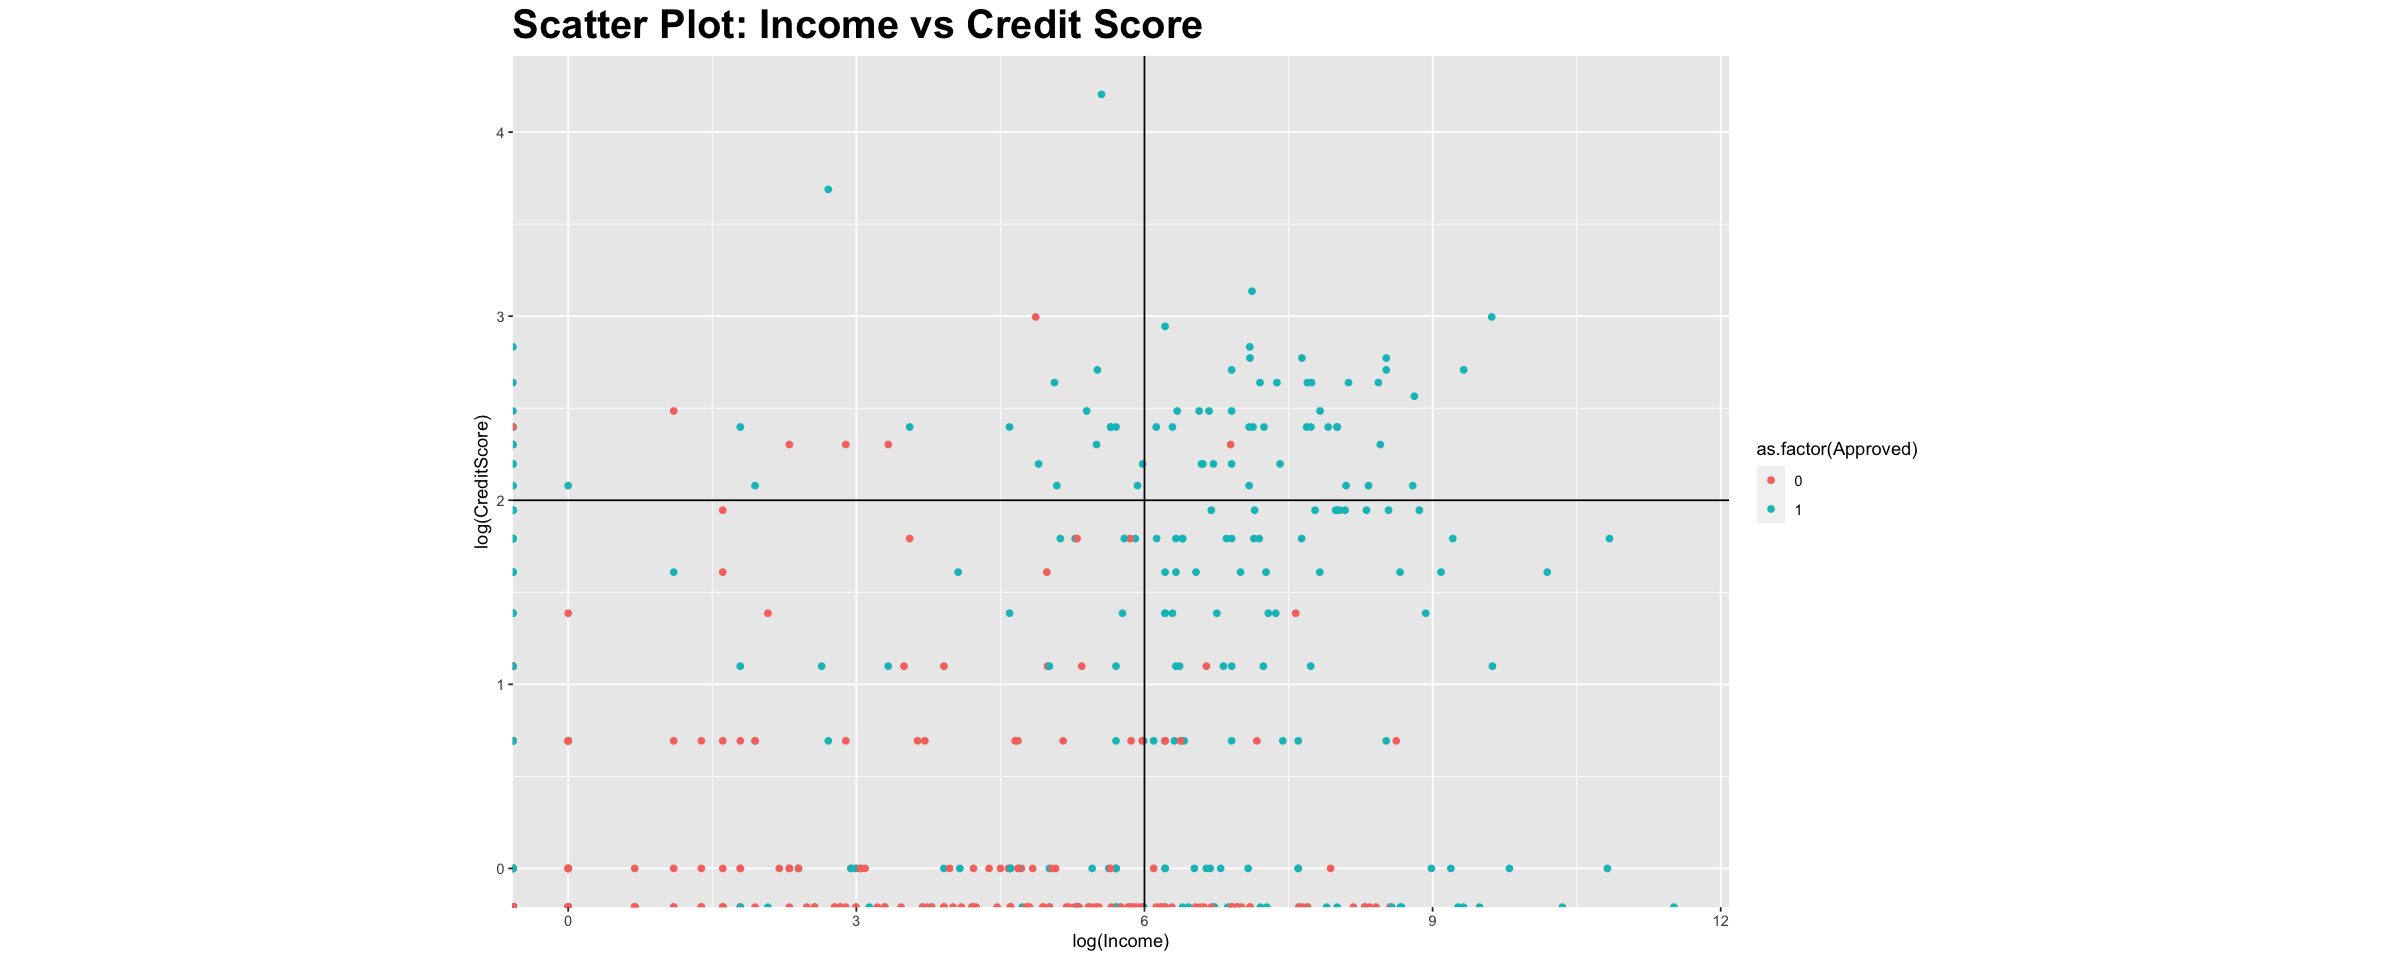

In [9]:
# SOLUTION BEGINS HERE
plt <- ggplot(approval_ds, aes( x = log(Income), y=log(CreditScore), col=as.factor(Approved))) +
  geom_point()
plt + ggtitle("Scatter Plot: Income vs Credit Score ") + theme(plot.title = element_text(size = 24, face = "bold"),aspect.ratio = .7) +
geom_vline(xintercept = 6) + geom_hline(yintercept = 2) 
# SOLUTION ENDS HERE

### How Years Employed and credit score are varying with respect to credit approval

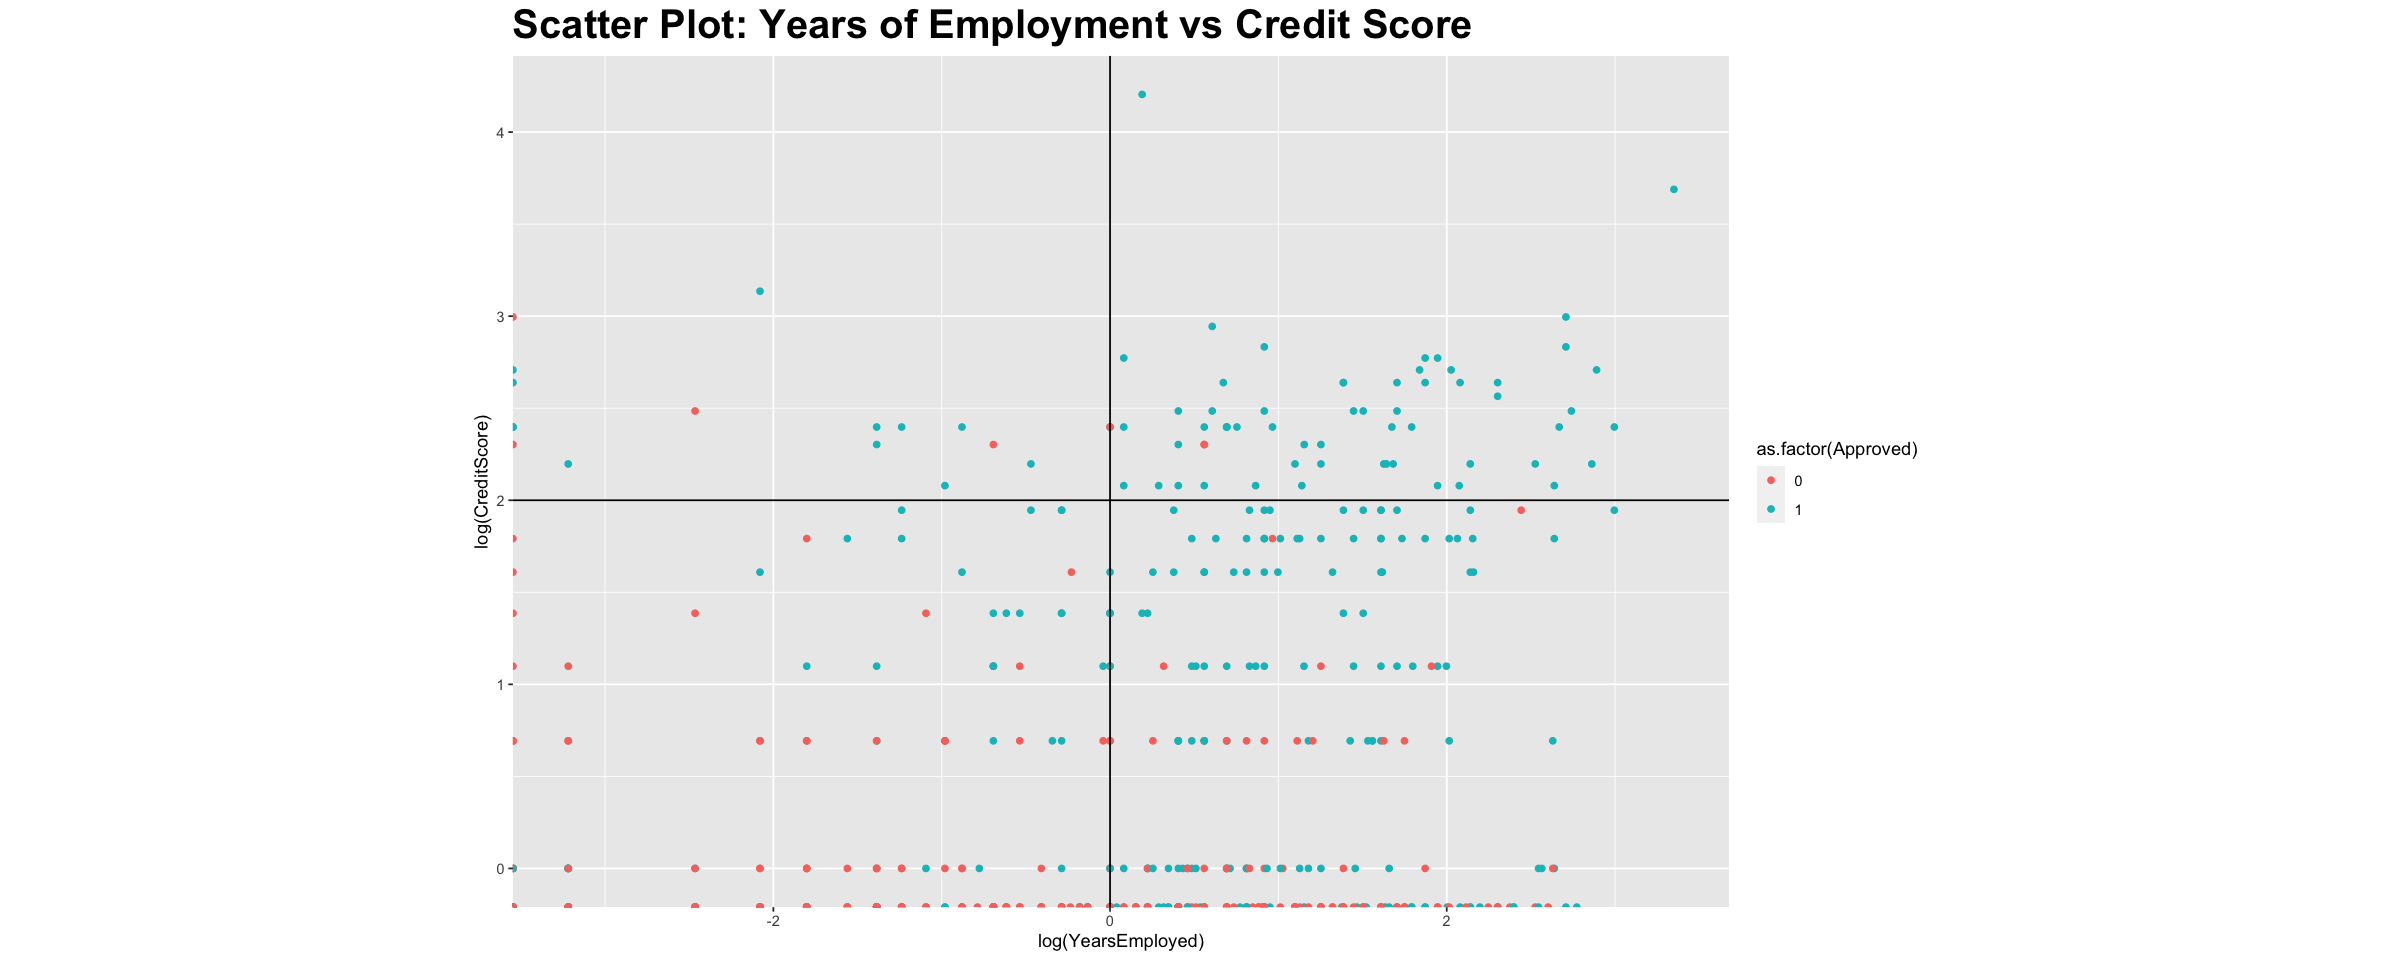

In [10]:
# SOLUTION BEGINS HERE
plt <- ggplot(approval_ds, aes( x = log(YearsEmployed), y=log(CreditScore), col=as.factor(Approved))) +
  geom_point()
plt + ggtitle("Scatter Plot: Years of Employment vs Credit Score ") + theme(plot.title = element_text(size = 24, face = "bold"),aspect.ratio = .7) +
geom_vline(xintercept = 0) + geom_hline(yintercept = 2) 
# SOLUTION ENDS HERE

### How Years Employed and Age are varying with respect to credit approval

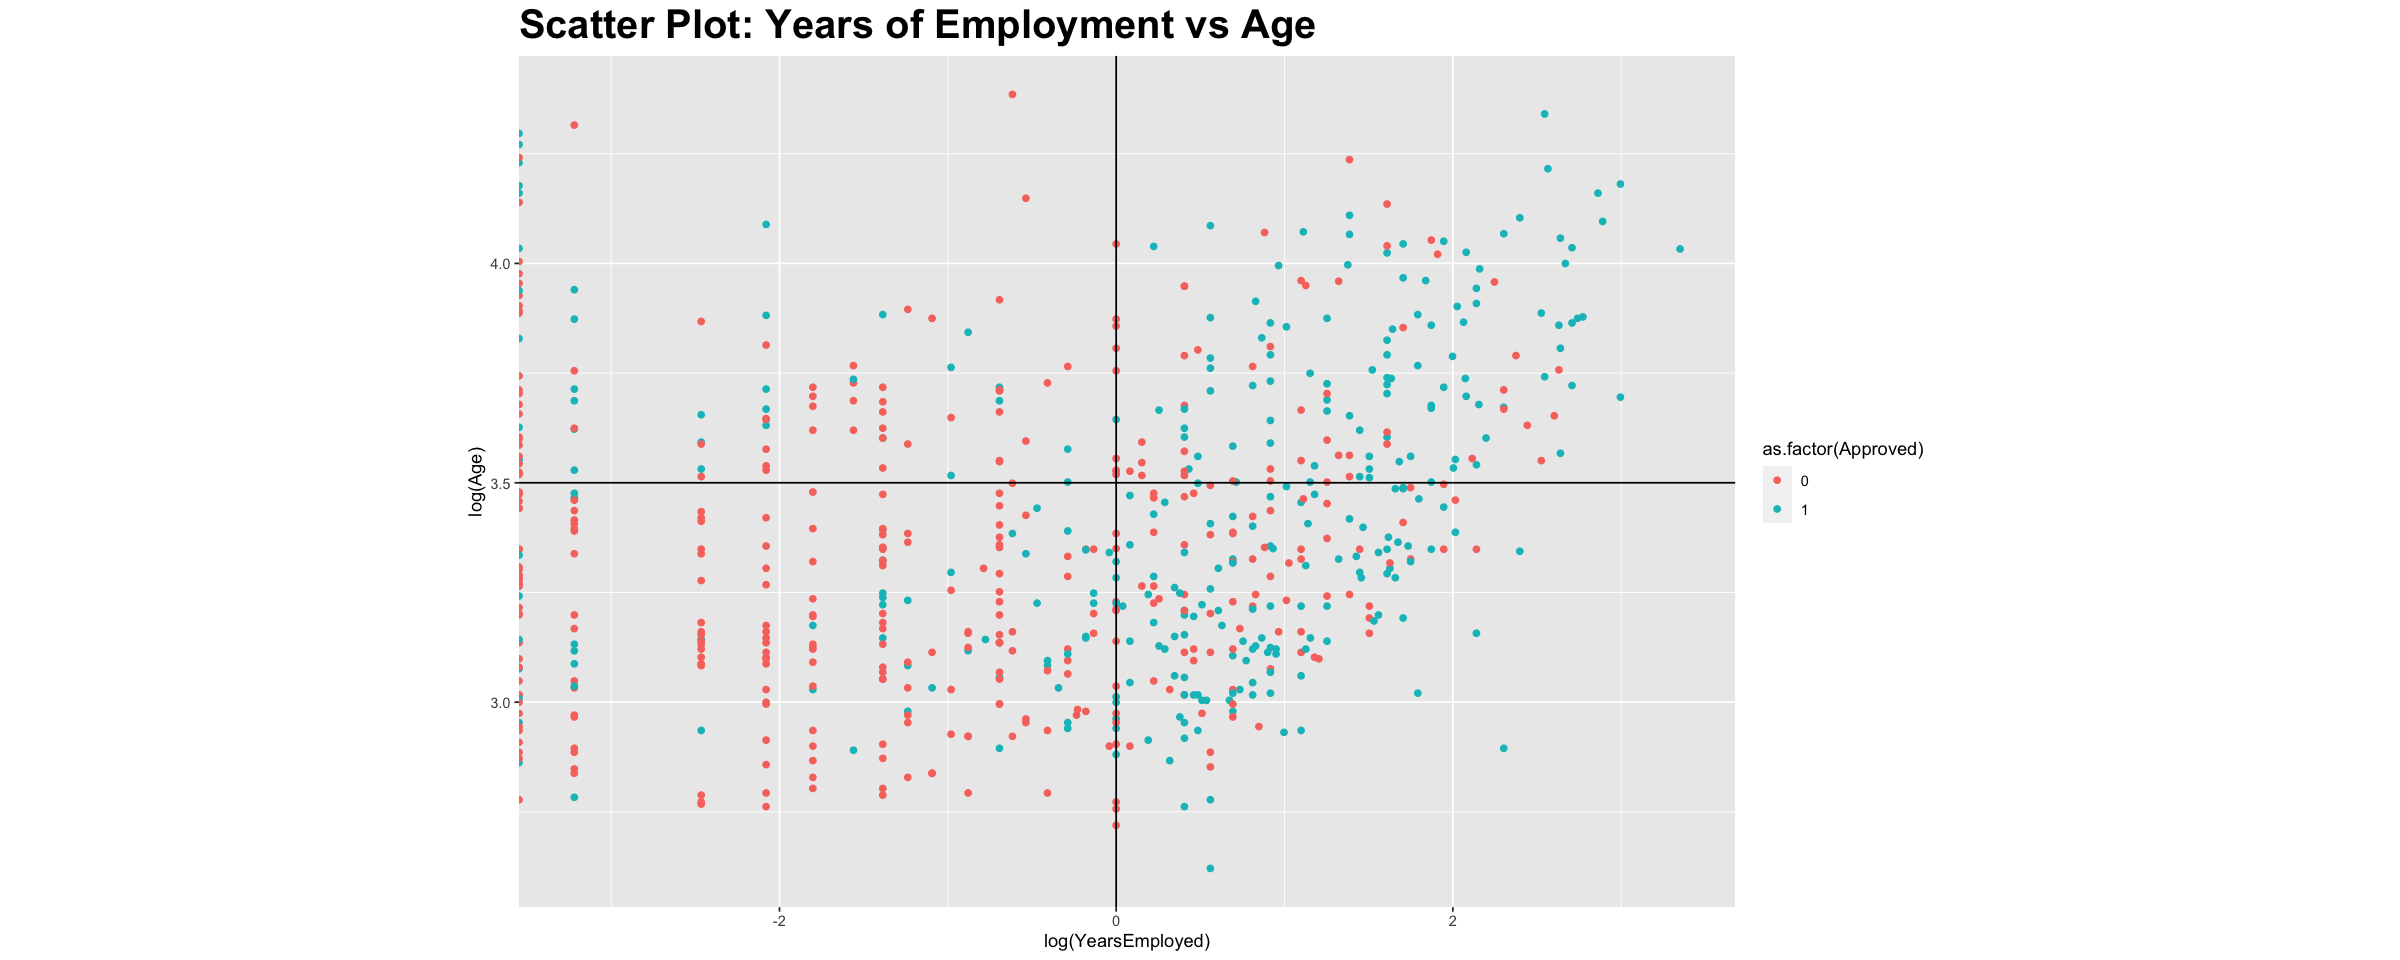

In [11]:
# SOLUTION BEGINS HERE
plt <- ggplot(approval_ds, aes( x = log(YearsEmployed), y=log(Age), col=as.factor(Approved))) +
  geom_point()
plt + ggtitle("Scatter Plot: Years of Employment vs Age ") + theme(plot.title = element_text(size = 24, face = "bold"),aspect.ratio = .7) +
geom_vline(xintercept = 0) + geom_hline(yintercept = 3.5) 
# SOLUTION ENDS HERE

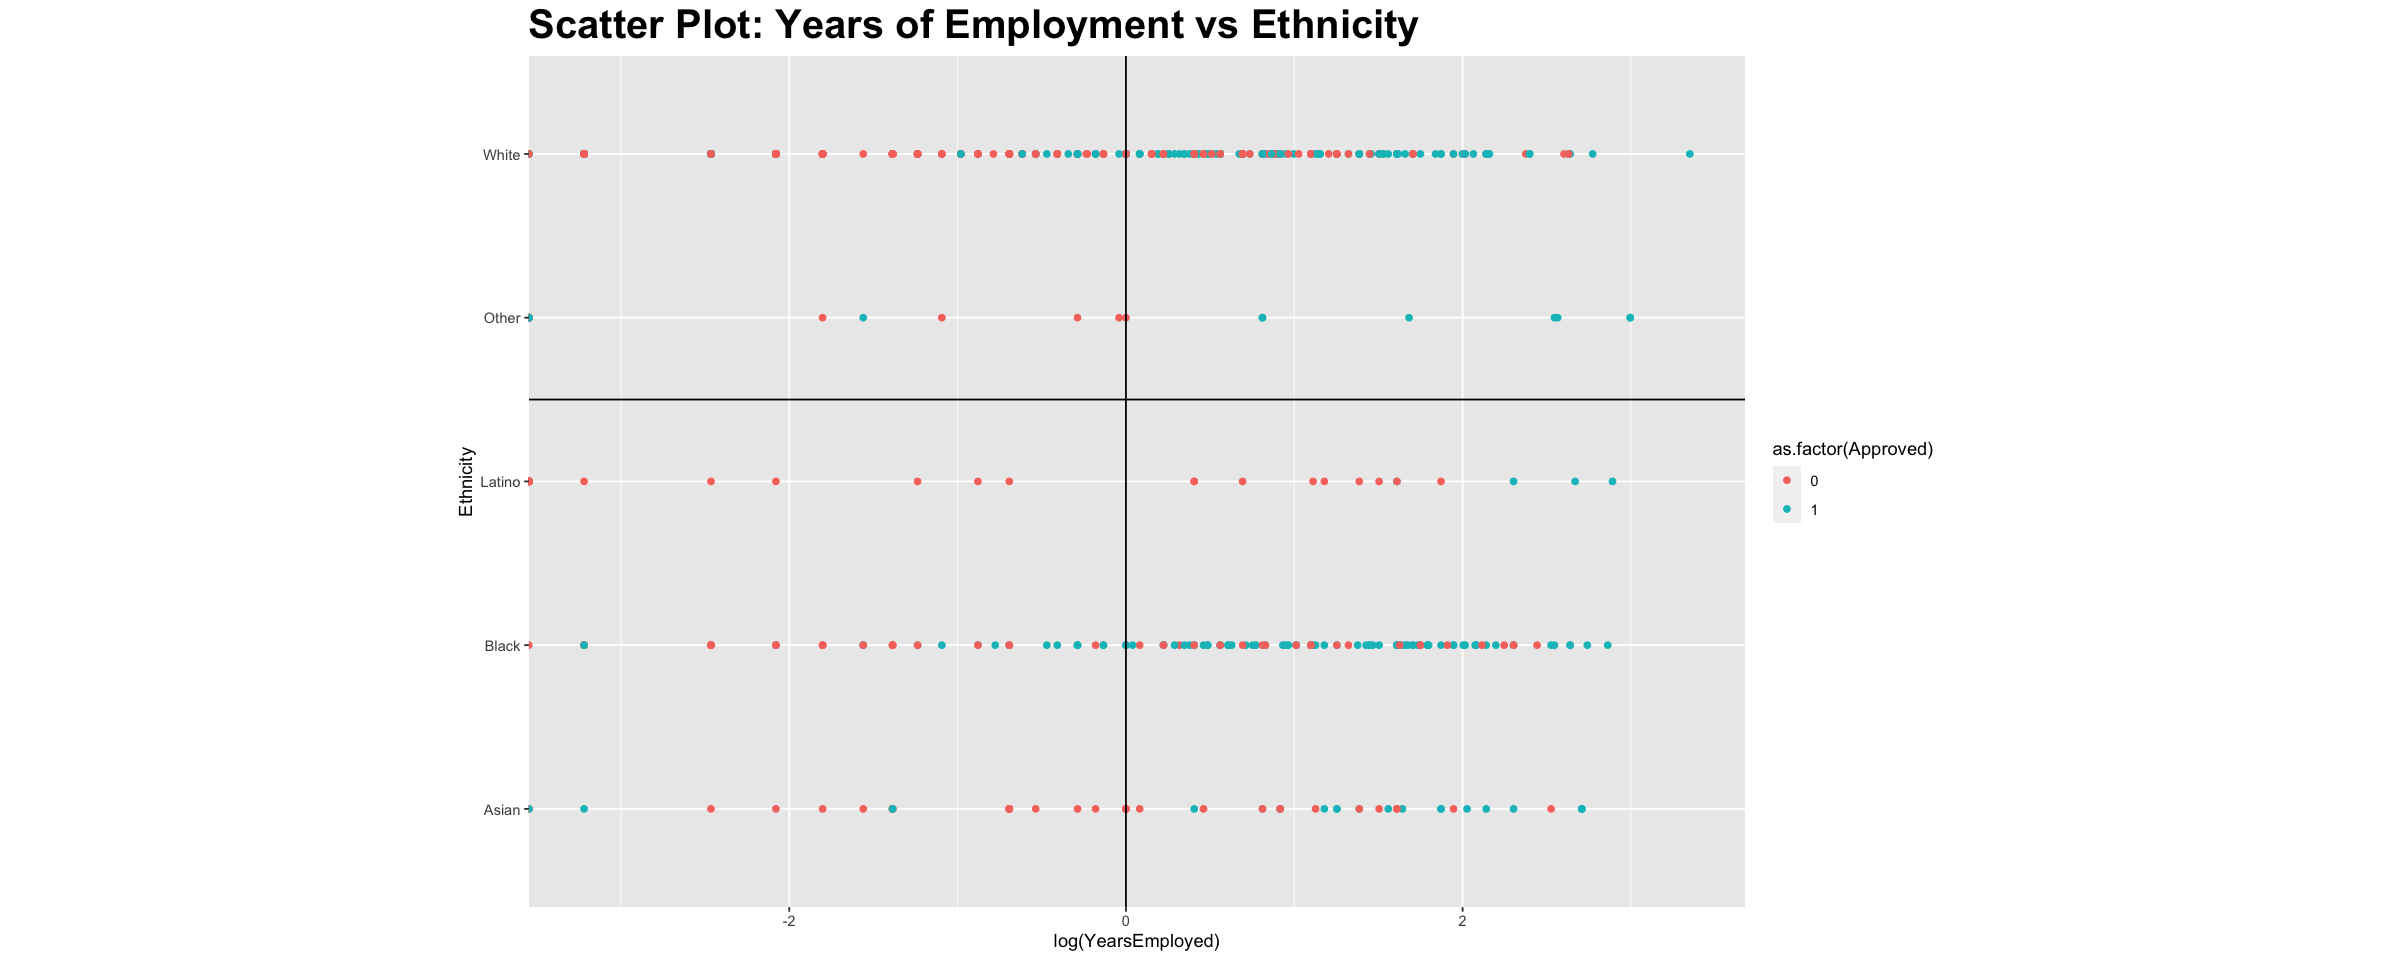

In [12]:
# SOLUTION BEGINS HERE
plt <- ggplot(approval_ds, aes( x = log(YearsEmployed), y=Ethnicity, col=as.factor(Approved))) +
  geom_point()
plt + ggtitle("Scatter Plot: Years of Employment vs Ethnicity ") + theme(plot.title = element_text(size = 24, face = "bold"),aspect.ratio = .7) +
geom_vline(xintercept = 0) + geom_hline(yintercept = 3.5) 
# SOLUTION ENDS HERE

# Approval Rating across Gender

Gender,ApprovalRate
<int>,<dbl>
0,0.4666667
1,0.4354167


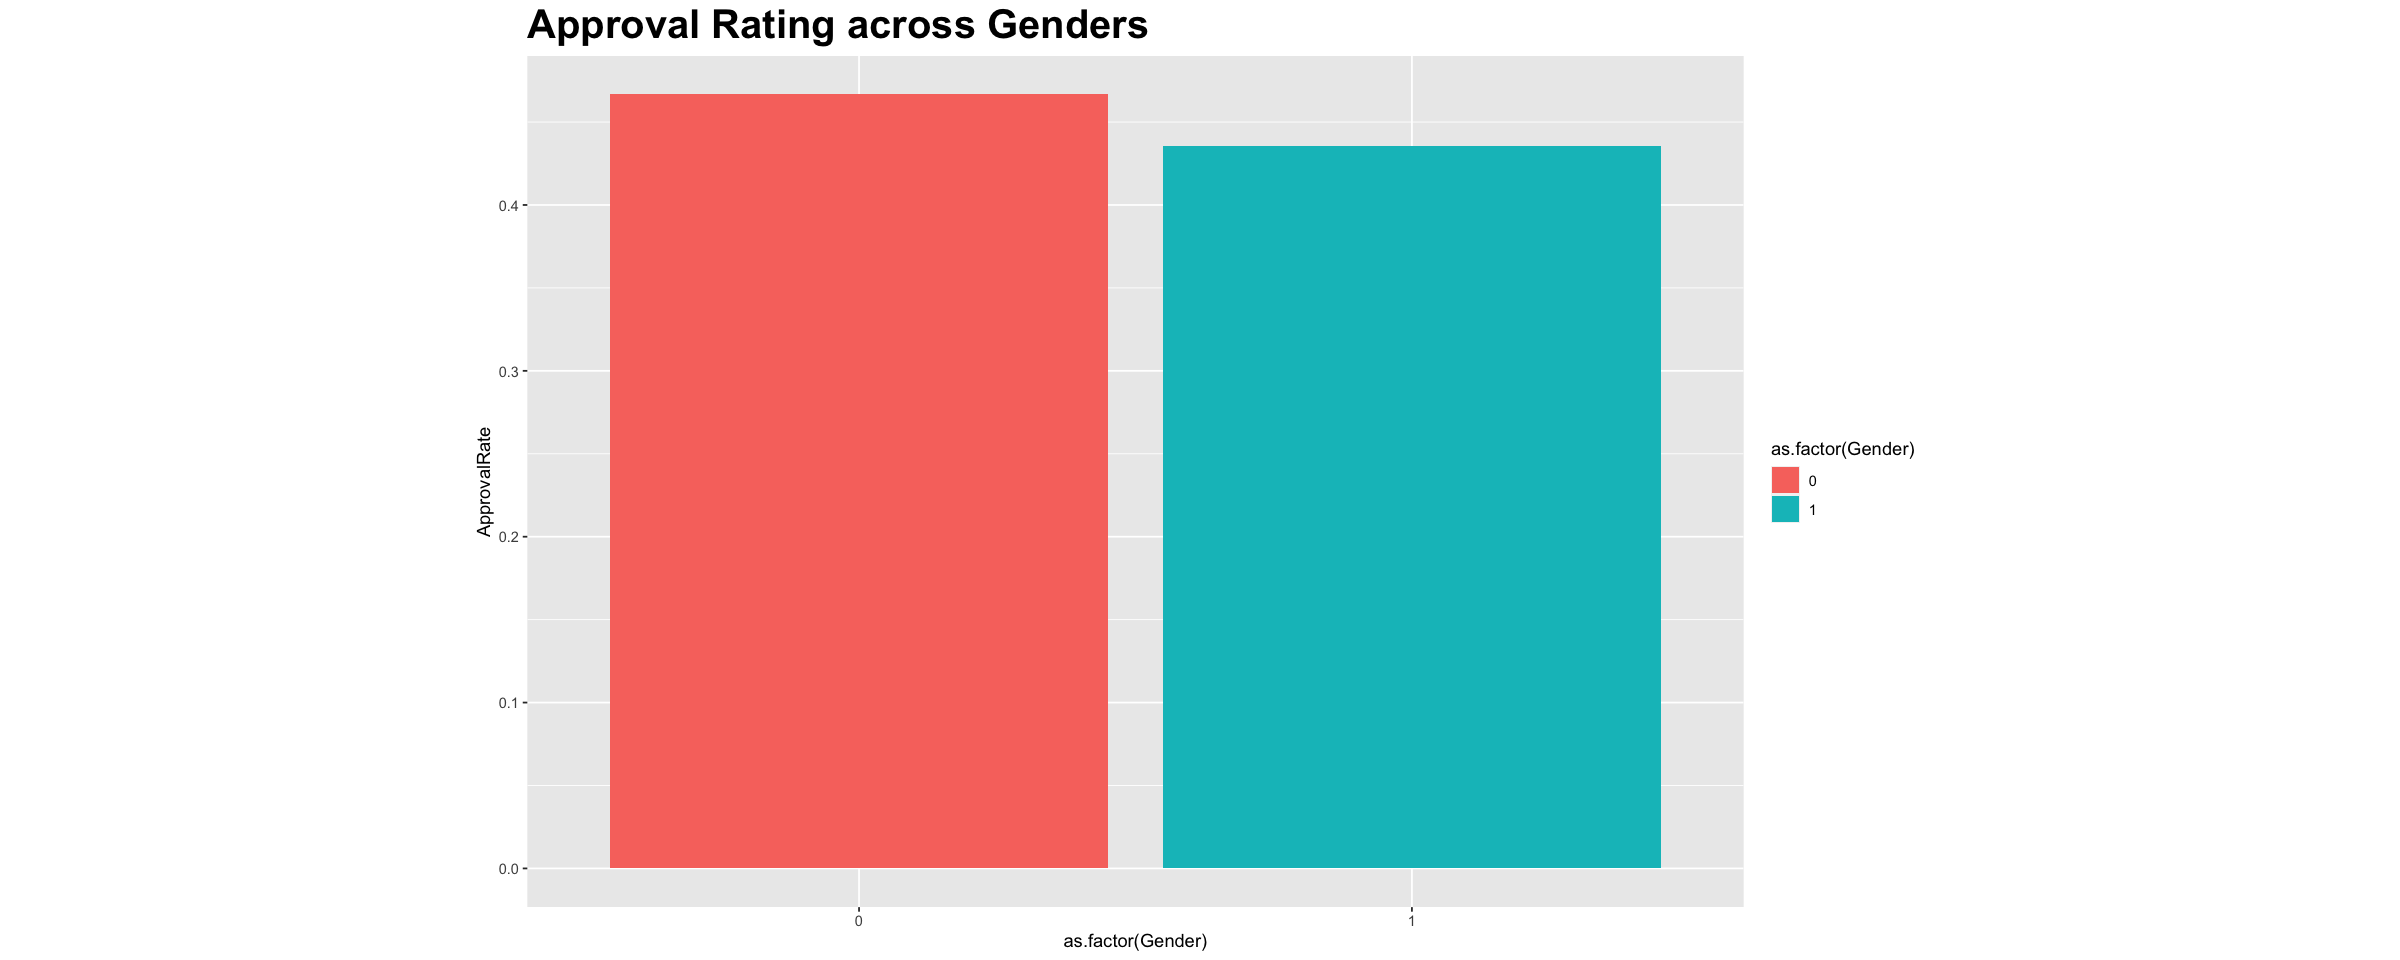

In [13]:
gender_appr <- approval_ds %>% group_by(Gender) %>% summarize(ApprovalRate = mean(Approved))

head(gender_appr)

ggplot(gender_appr, aes(x=as.factor(Gender), y=ApprovalRate, fill= as.factor(Gender)))+ geom_bar(stat = "identity")+
ggtitle("Approval Rating across Genders ") + theme(plot.title = element_text(size = 24, face = "bold"),aspect.ratio = .7)

# Approval Rating across Ethnicities


Ethnicity,ApprovalRate
<chr>,<dbl>
Asian,0.4237288
Black,0.6304348
Latino,0.1403509
Other,0.5000000
White,0.4240196


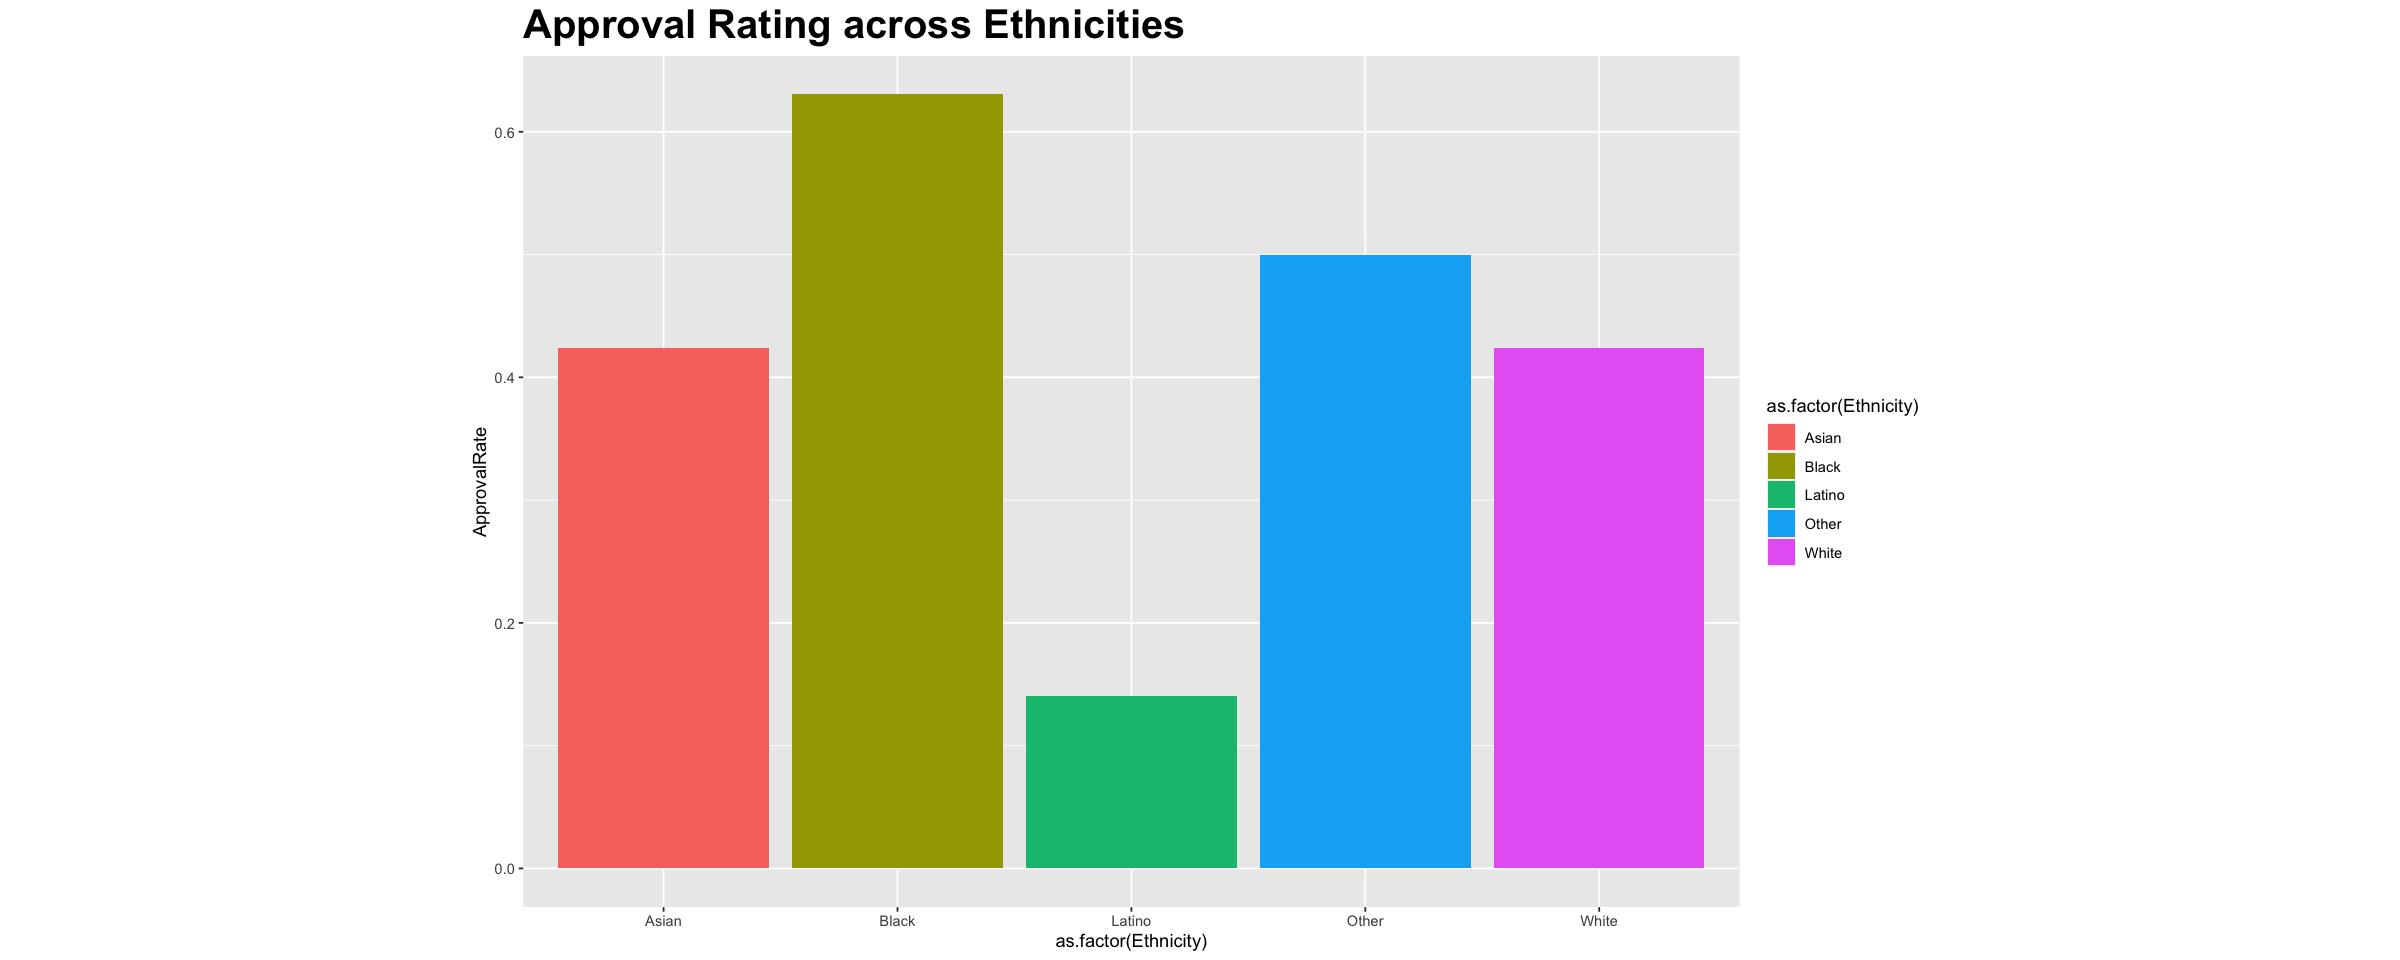

In [14]:
gender_appr <- approval_ds %>% group_by(Ethnicity) %>% summarize(ApprovalRate = mean(Approved))

head(gender_appr)

ggplot(gender_appr, aes(x=as.factor(Ethnicity), y=ApprovalRate, fill= as.factor(Ethnicity)))+ geom_bar(stat = "identity")+
ggtitle("Approval Rating across Ethnicities ") + theme(plot.title = element_text(size = 24, face = "bold"),aspect.ratio = .7)

# Approval Rating across Marital Status

Married,ApprovalRate
<int>,<dbl>
0,0.2848485
1,0.4952381


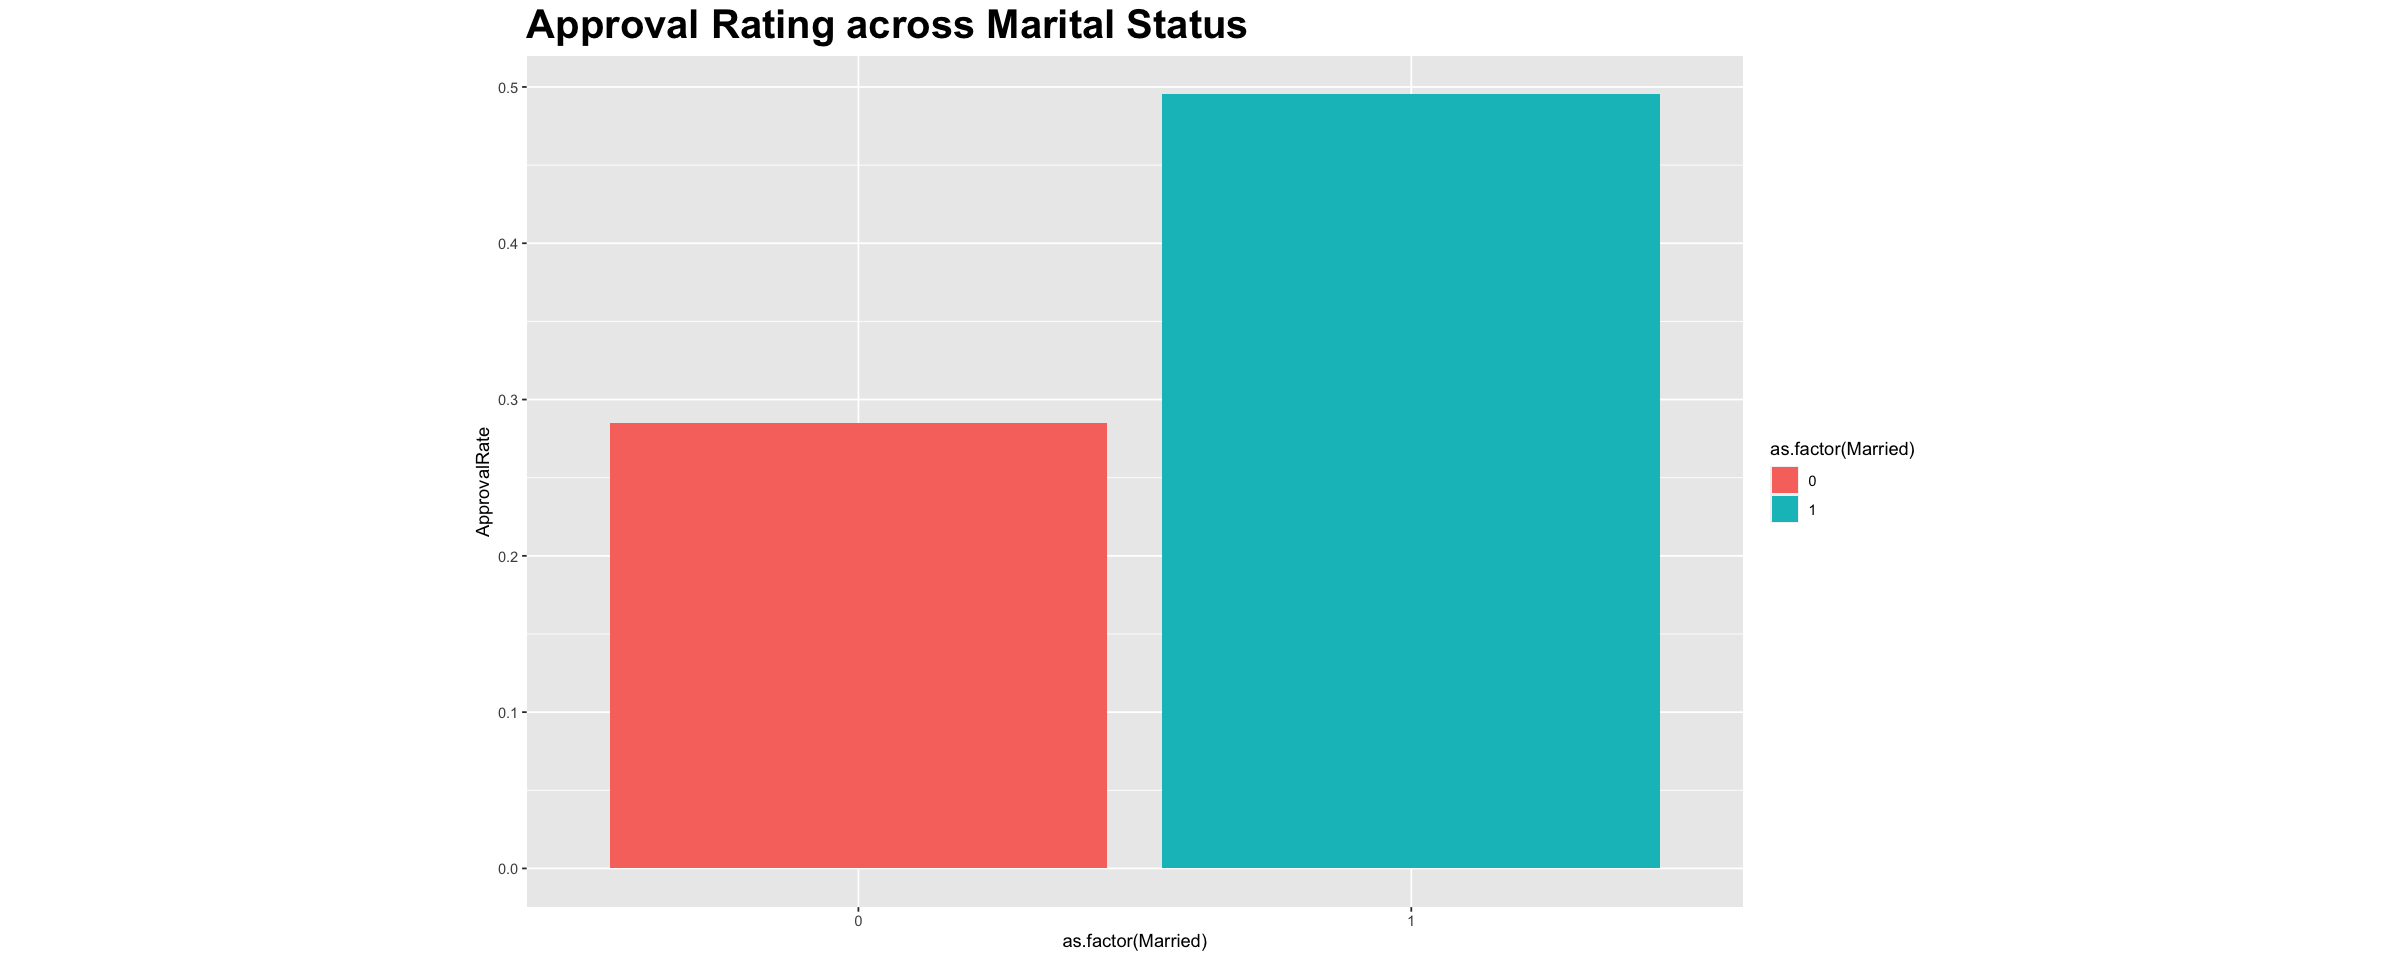

In [15]:
gender_appr <- approval_ds %>% group_by(Married) %>% summarize(ApprovalRate = mean(Approved))

head(gender_appr)

ggplot(gender_appr, aes(x=as.factor(Married), y=ApprovalRate, fill= as.factor(Married)))+ geom_bar(stat = "identity")+
ggtitle("Approval Rating across Marital Status ") + theme(plot.title = element_text(size = 24, face = "bold"),aspect.ratio = .7)


# Approval Rating across Industry

Industry,ApprovalRate
<chr>,<dbl>
CommunicationServices,0.4210526
ConsumerDiscretionary,0.2372881
ConsumerStaples,0.3518519
Education,0.5600000
Energy,0.4520548
Financials,0.2745098


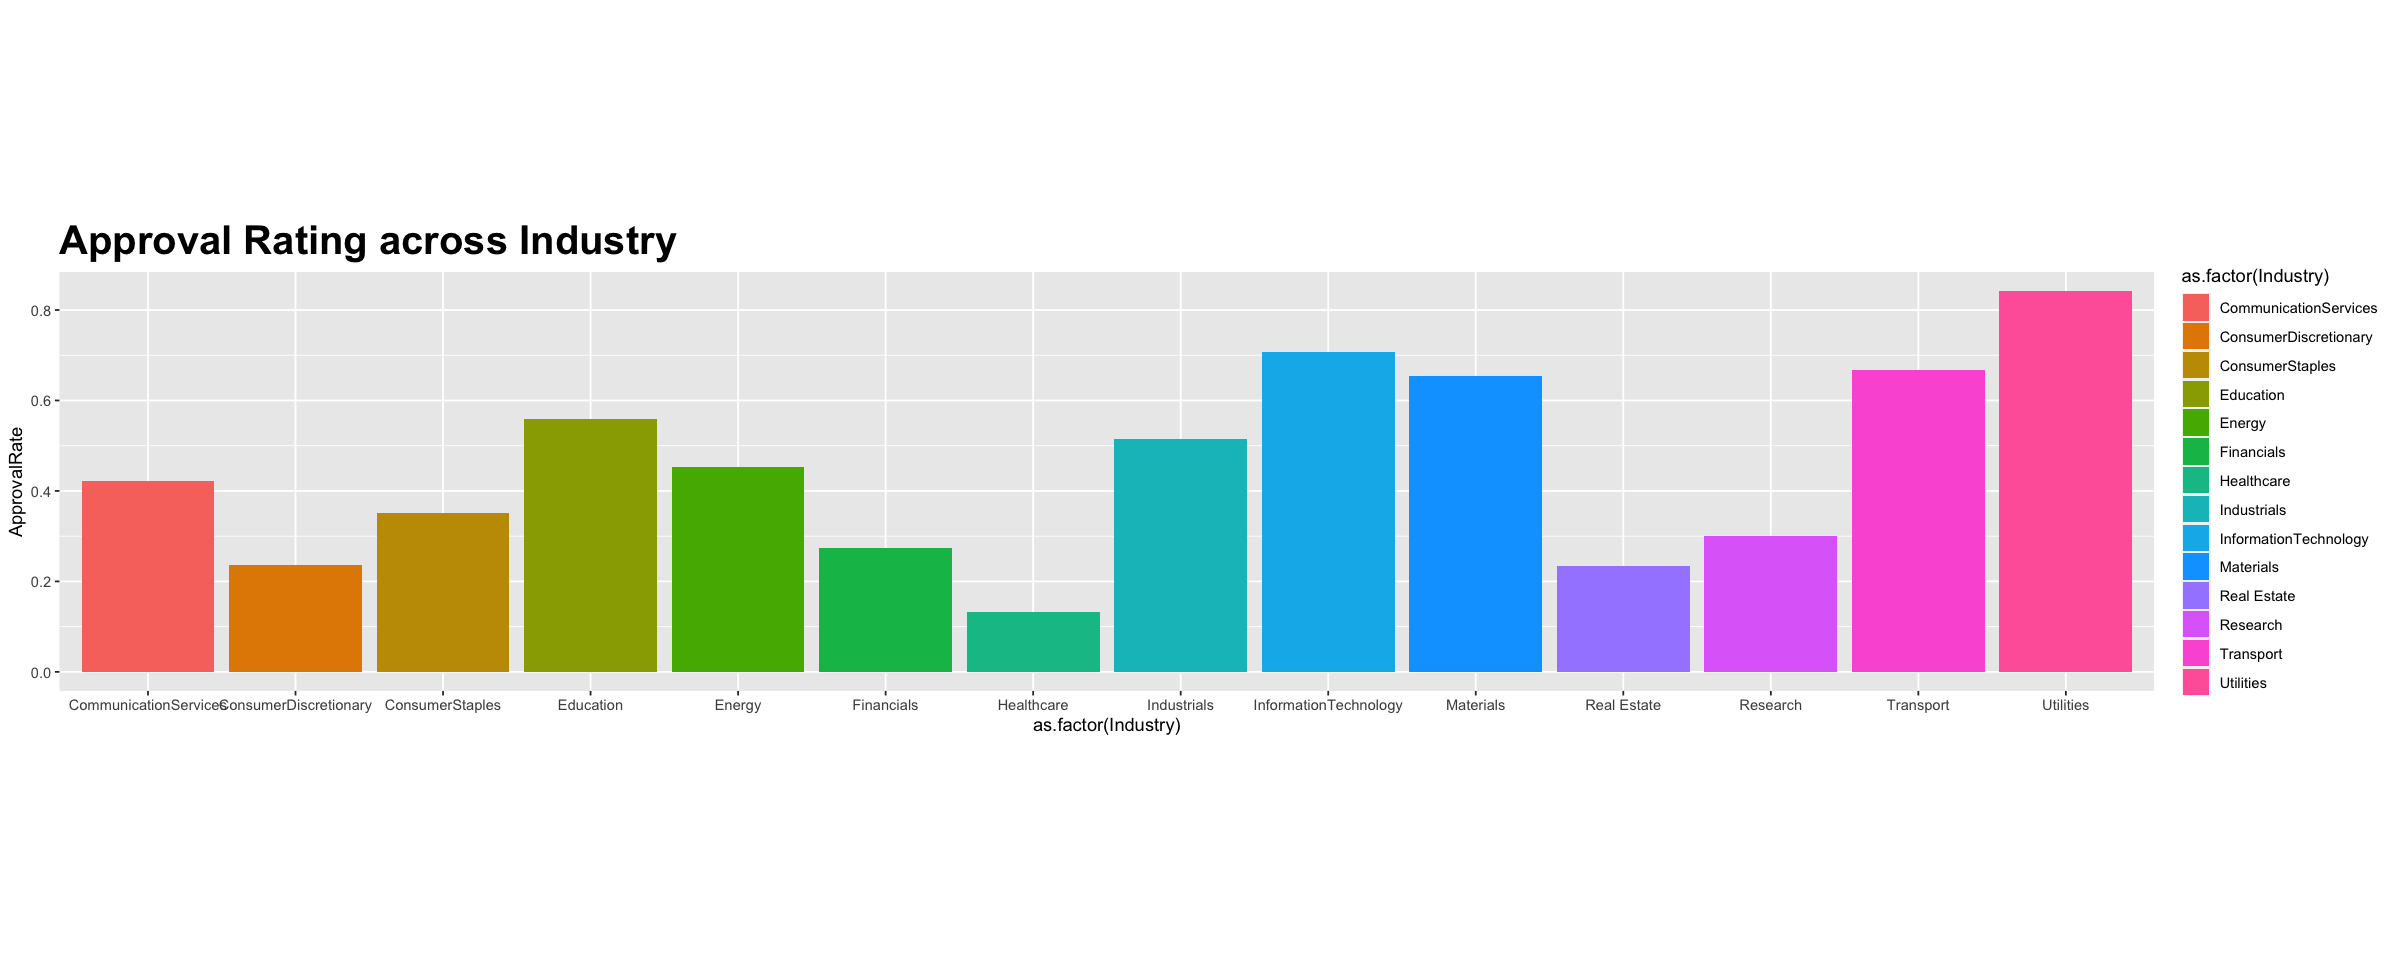

In [16]:
gender_appr <- approval_ds %>% group_by(Industry) %>% summarize(ApprovalRate = mean(Approved))

head(gender_appr)

ggplot(gender_appr, aes(x=as.factor(Industry), y=ApprovalRate, fill= as.factor(Industry)))+ geom_bar(stat = "identity")+
ggtitle("Approval Rating across Industry ") + theme(plot.title = element_text(size = 24, face = "bold"),aspect.ratio = .2)


# Income across ethnicities

Ethnicity,meanIncome
<chr>,<dbl>
Asian,1762.2712
Black,968.1812
Latino,434.6491
Other,4389.0357
White,776.3358


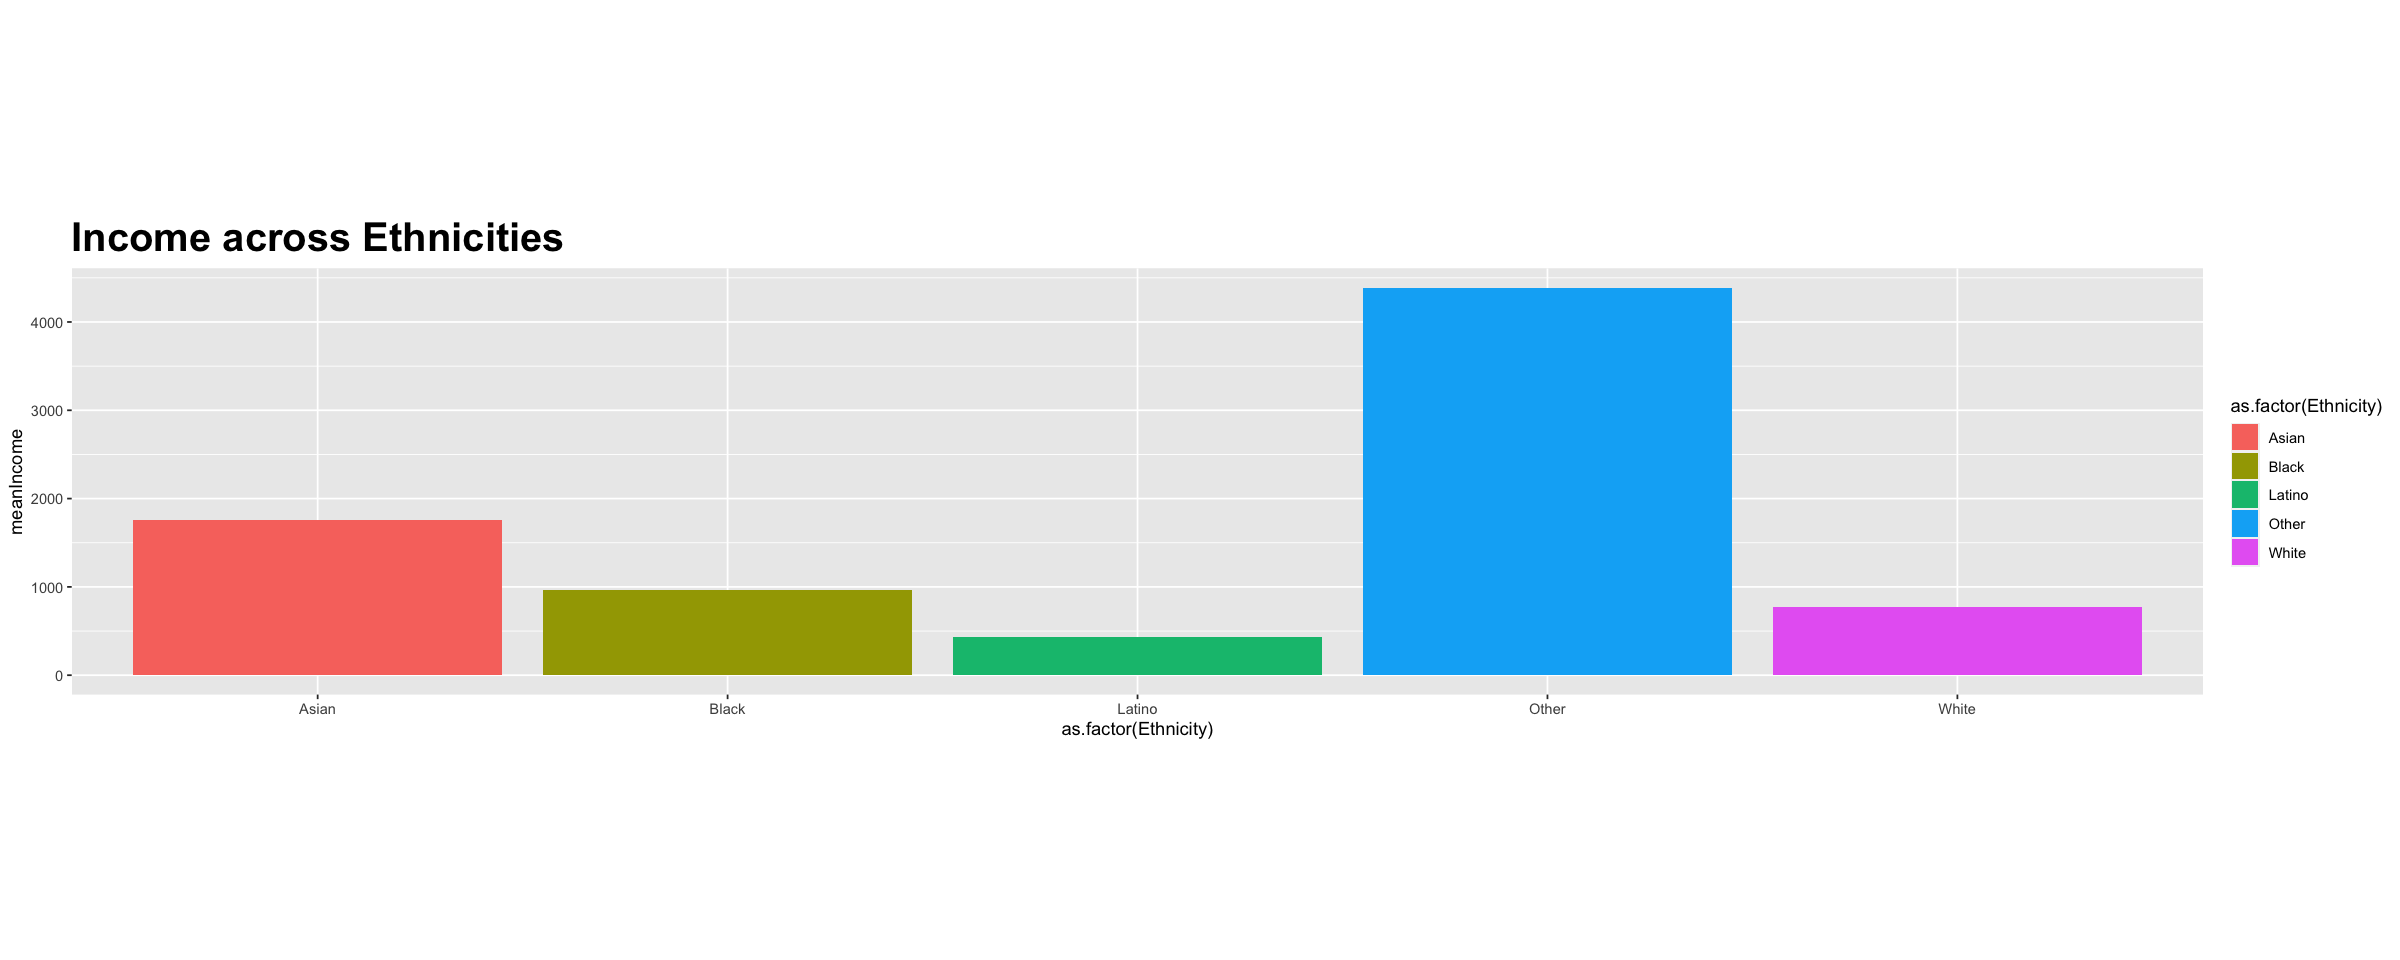

In [17]:
gender_appr <- approval_ds %>% group_by(Ethnicity) %>% summarize(meanIncome = mean(Income))

head(gender_appr)

ggplot(gender_appr, aes(x=as.factor(Ethnicity), y=meanIncome, fill= as.factor(Ethnicity)))+ geom_bar(stat = "identity")+
ggtitle("Income across Ethnicities ") + theme(plot.title = element_text(size = 24, face = "bold"),aspect.ratio = .2)


# Prior Default Rate across Ethnicity

Ethnicity,priorDefaultRate
<chr>,<dbl>
Asian,0.5932203
Black,0.7101449
Latino,0.2280702
Other,0.4642857
White,0.4950980


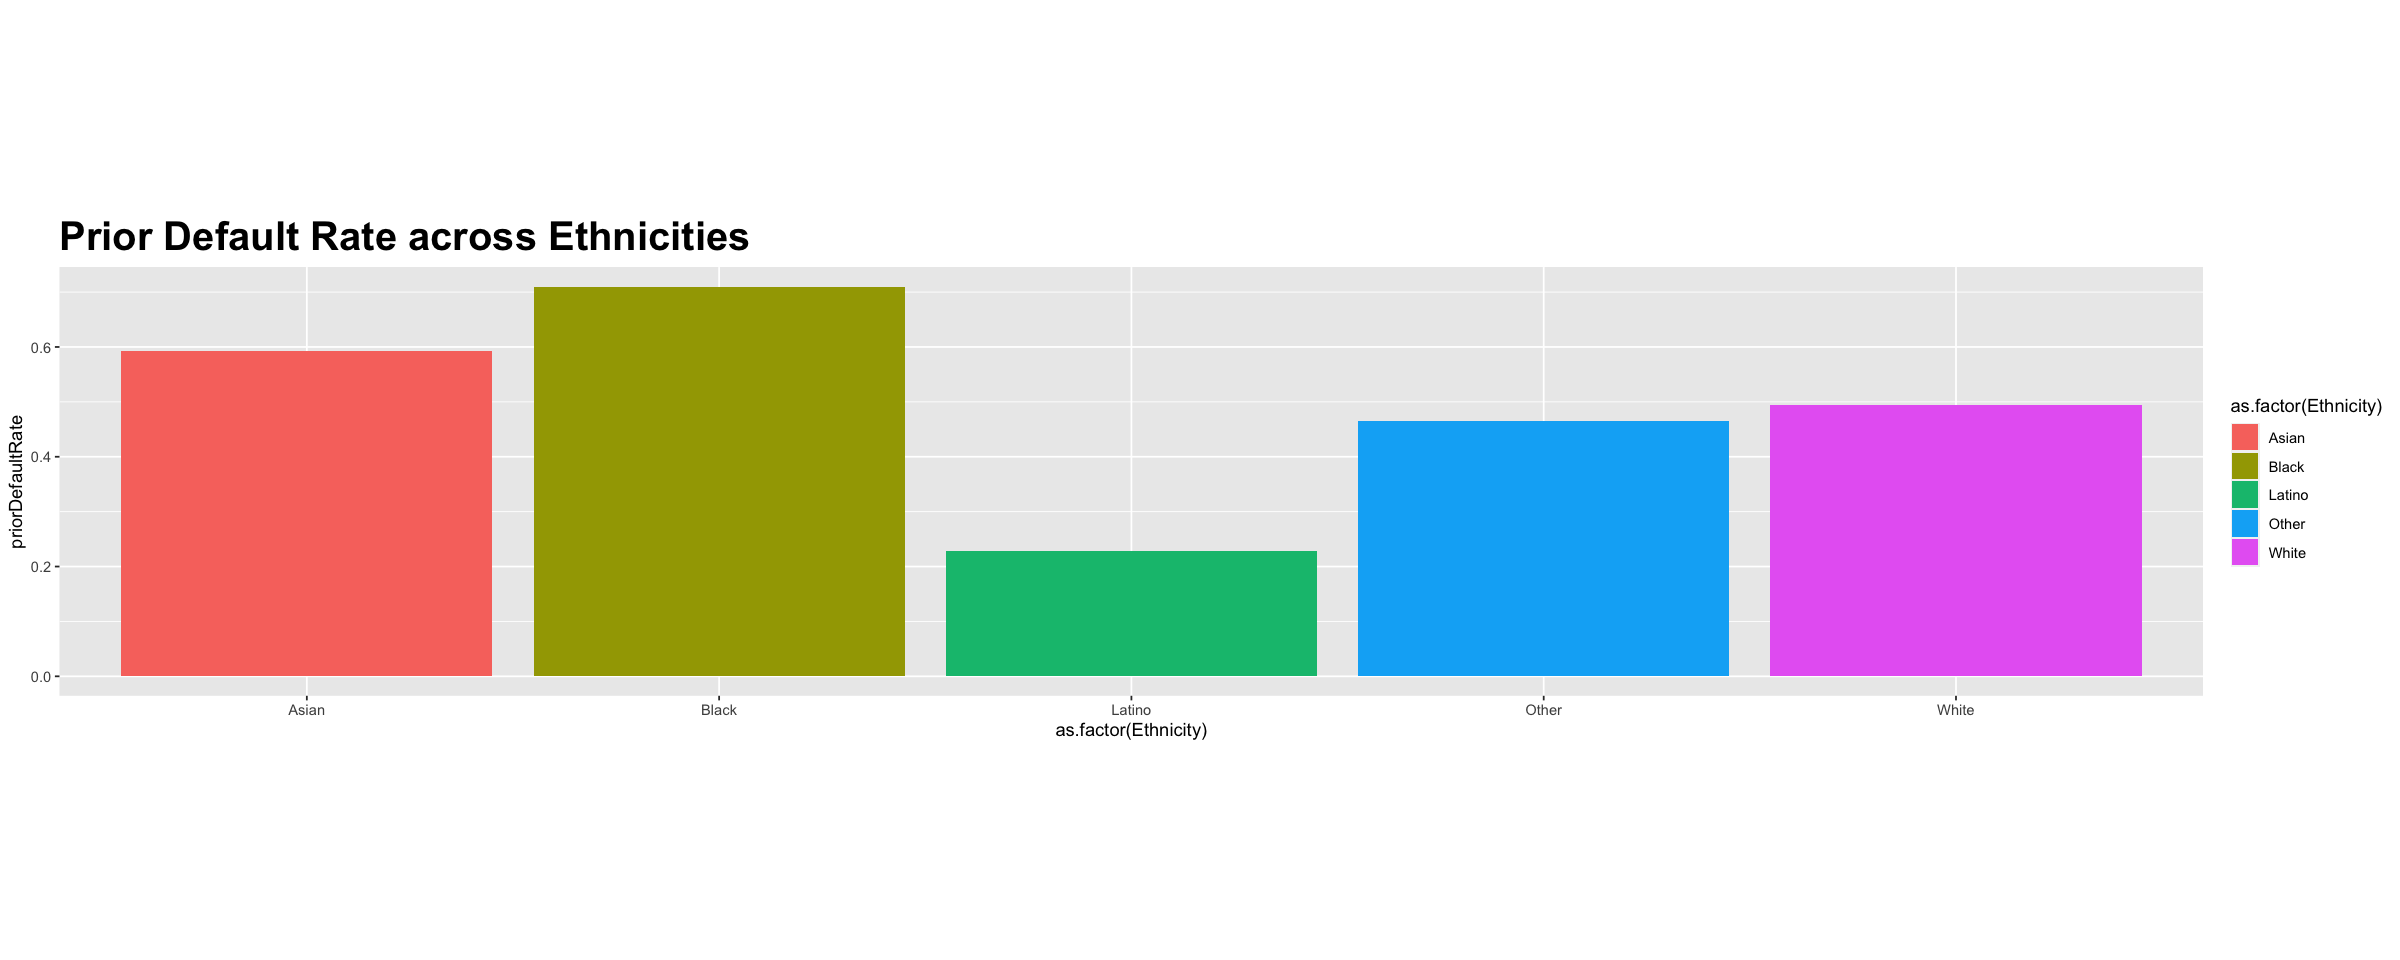

In [18]:
gender_appr <- approval_ds %>% group_by(Ethnicity) %>% summarize(priorDefaultRate = mean(PriorDefault))

head(gender_appr)

ggplot(gender_appr, aes(x=as.factor(Ethnicity), y=priorDefaultRate, fill= as.factor(Ethnicity)))+ geom_bar(stat = "identity")+
ggtitle("Prior Default Rate across Ethnicities ") + theme(plot.title = element_text(size = 24, face = "bold"),aspect.ratio = .2)


## Histogram of Credit Scores

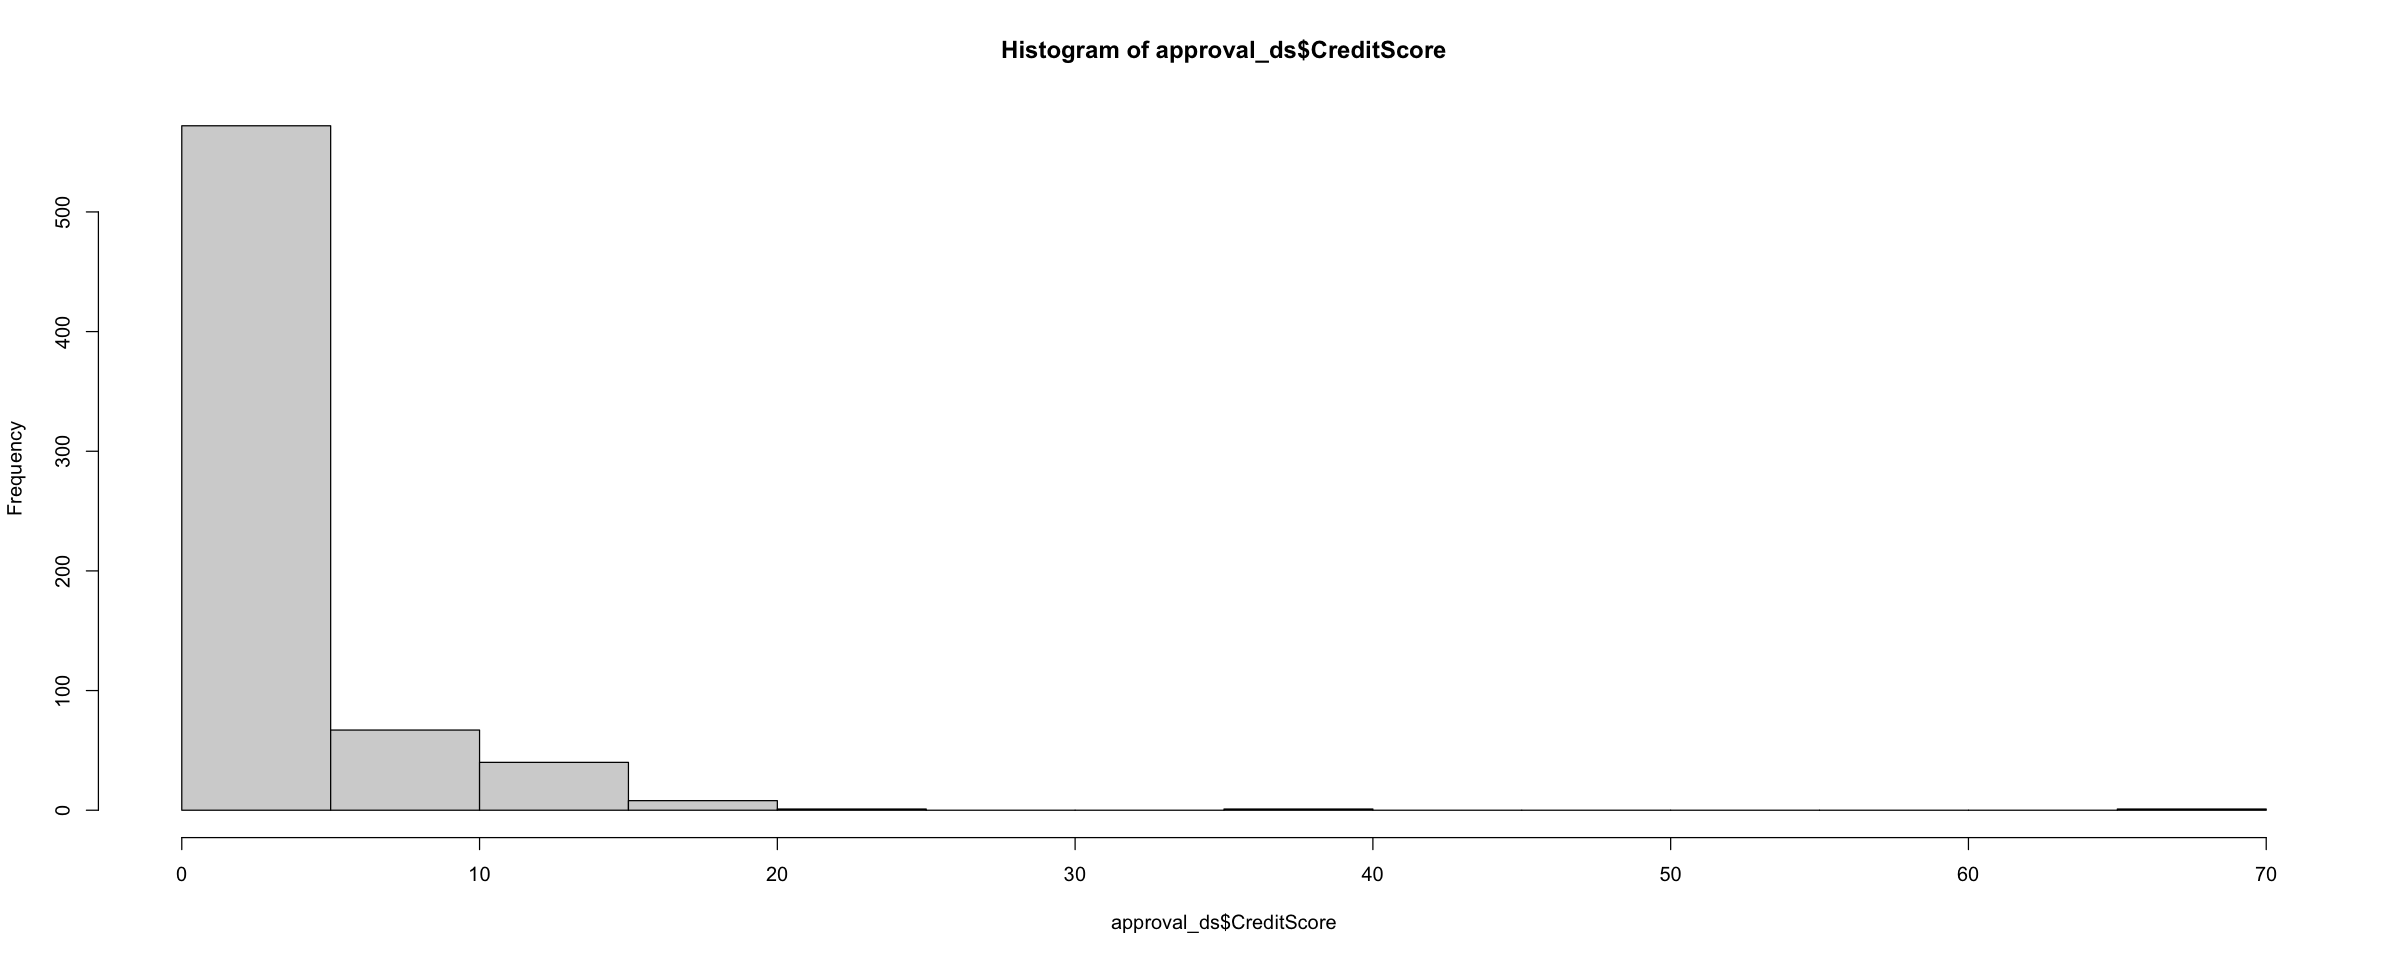

In [19]:
hist(approval_ds$CreditScore)

## Histogram of Credit Scores after Log Transformed

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0     0.0     2.4     3.0    67.0 

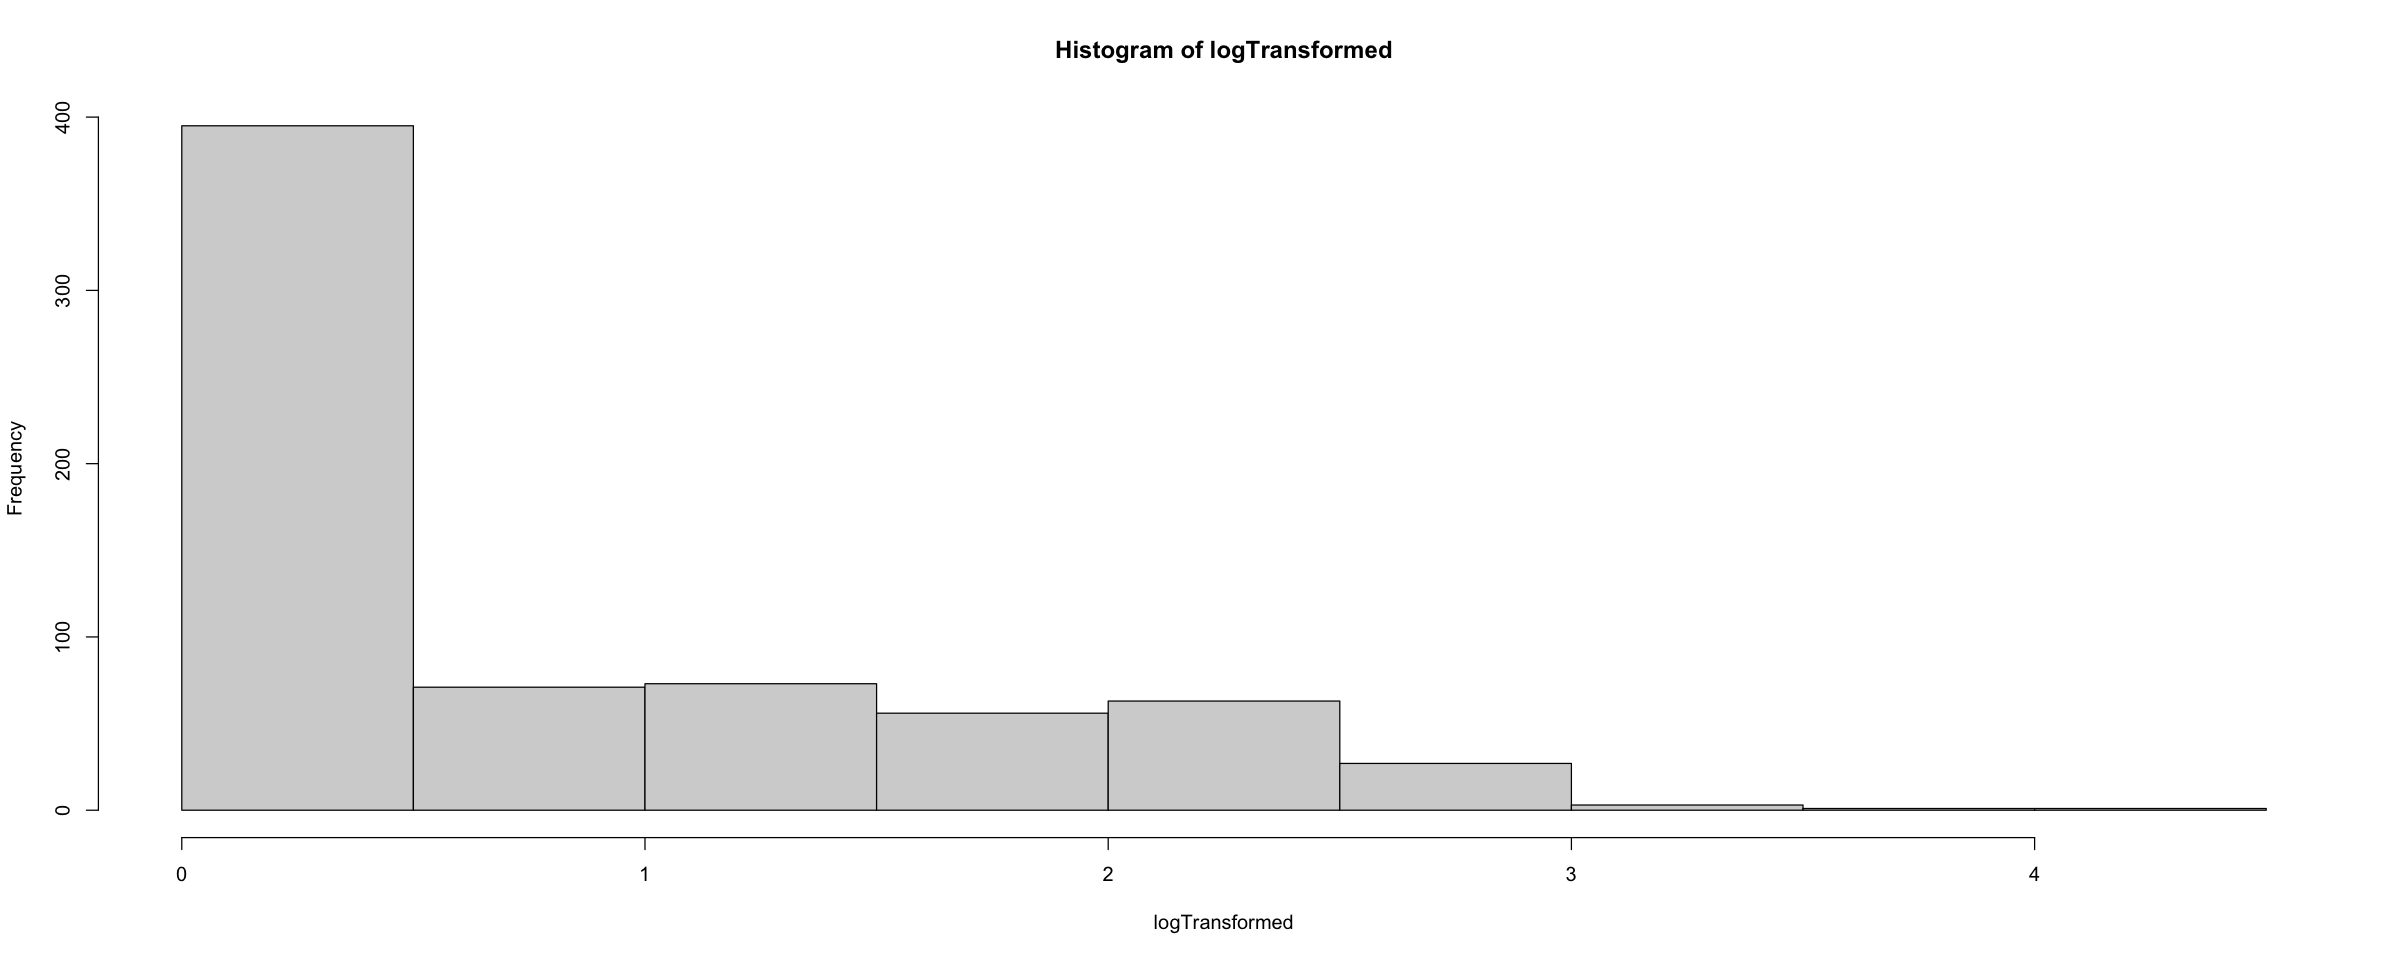

In [20]:
summary(approval_ds$CreditScore)
logTransformed <- log(approval_ds$CreditScore+1)
hist(logTransformed)

## Testing if Age and Experience are Colinear 

                    Age YearsEmployed
Age           1.0000000     0.3914636
YearsEmployed 0.3914636     1.0000000


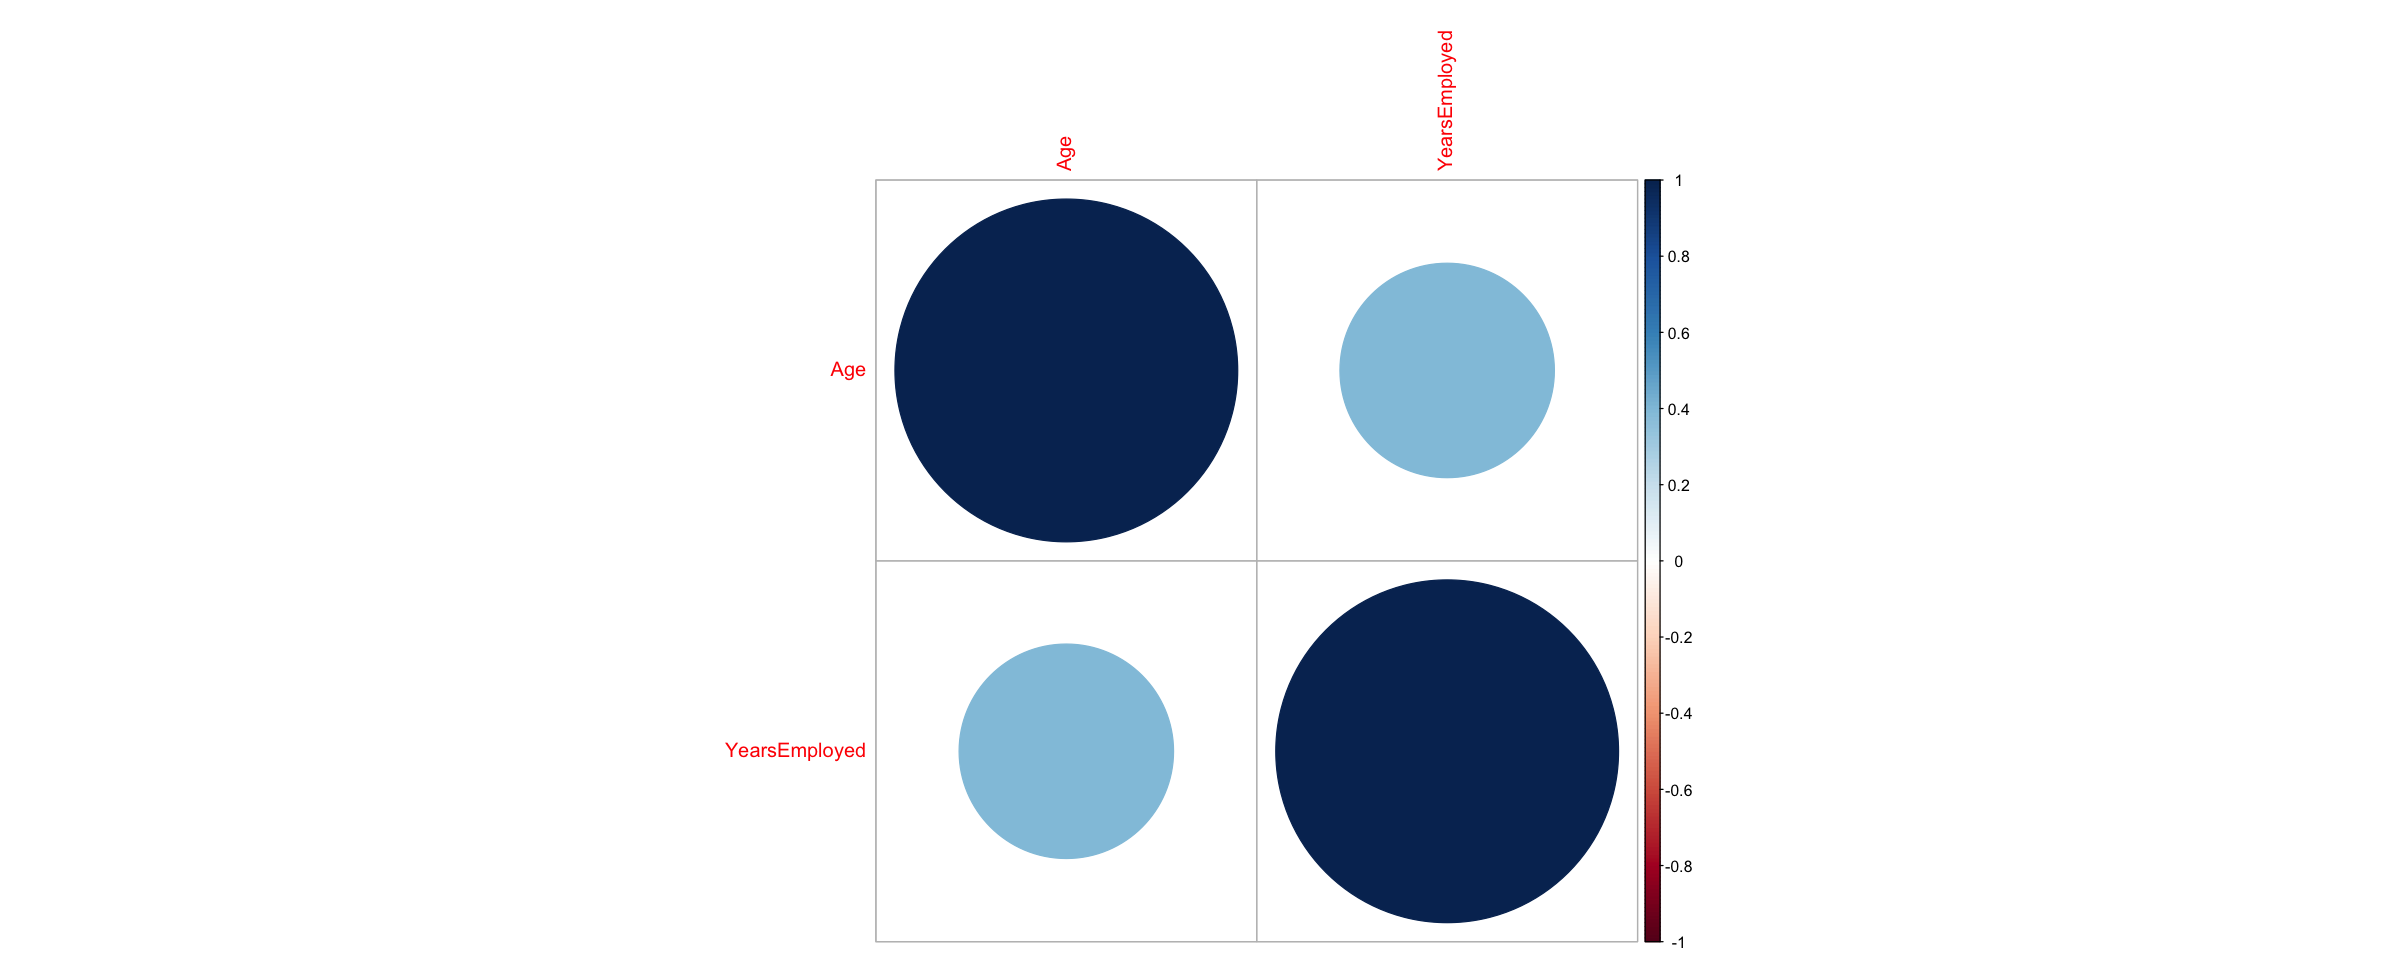

In [21]:
Age_Col <- cor(approval_ds[c("Age", "YearsEmployed")])
print(Age_Col)
corrplot(Age_Col)

**Inference**
As we could see from the correlation plot Age and Years of Employment is not entirely related to each other. As expected the are is a postive Correlation between each other, but one paramter could explain only 39% percent of data of the other paramters

## Considering the following variables for further analysis

* Debt	
* Married	
* BankCustomer
* YearsEmployed	
* PriorDefault	
* Employed	
* CreditScore	
* DriversLicense	
* Citizen		
* Income

In [19]:
cust_dataset <- approval_ds[c("Debt", "Married", "BankCustomer", "YearsEmployed", 
                              "PriorDefault", "Employed", "CreditScore", "DriversLicense", "Citizen",
                              "Income", "Approved")]

# creating dummy columns for Citizenship
# finding out unique values of Citizen variable

unique(cust_dataset$Citizen)

# making citizen ship by birth as base case and creating two dummy columns for ByOtherMeans and Temporary

cust_dataset <- cust_dataset %>% mutate(CitizenByOtherMeans = ifelse(Citizen == "ByOtherMeans", 1 , 0))
cust_dataset <- cust_dataset %>% mutate(CitizenTemporary = ifelse(Citizen == "Temporary", 1 , 0))

# removing original column
cust_dataset <- cust_dataset %>% dplyr::select(-c(Citizen))



# looking at the final dataset
head(cust_dataset, n=10)

[1] "ByBirth"      "ByOtherMeans" "Temporary"

,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income,Approved,CitizenByOtherMeans,CitizenTemporary
,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,0.000,1,1,1.250,1,1,1,0,0,1,0,0
2,4.460,1,1,3.040,1,1,6,0,560,1,0,0
3,0.500,1,1,1.500,1,0,0,0,824,1,0,0
4,1.540,1,1,3.750,1,1,5,1,3,1,0,0
5,5.625,1,1,1.710,1,0,0,0,0,1,1,0
6,4.000,1,1,2.500,1,0,0,1,0,1,0,0
7,1.040,1,1,6.500,1,0,0,1,31285,1,0,0
8,11.585,1,1,0.040,1,0,0,0,1349,1,0,0
9,0.500,0,0,3.960,1,0,0,0,314,1,0,0


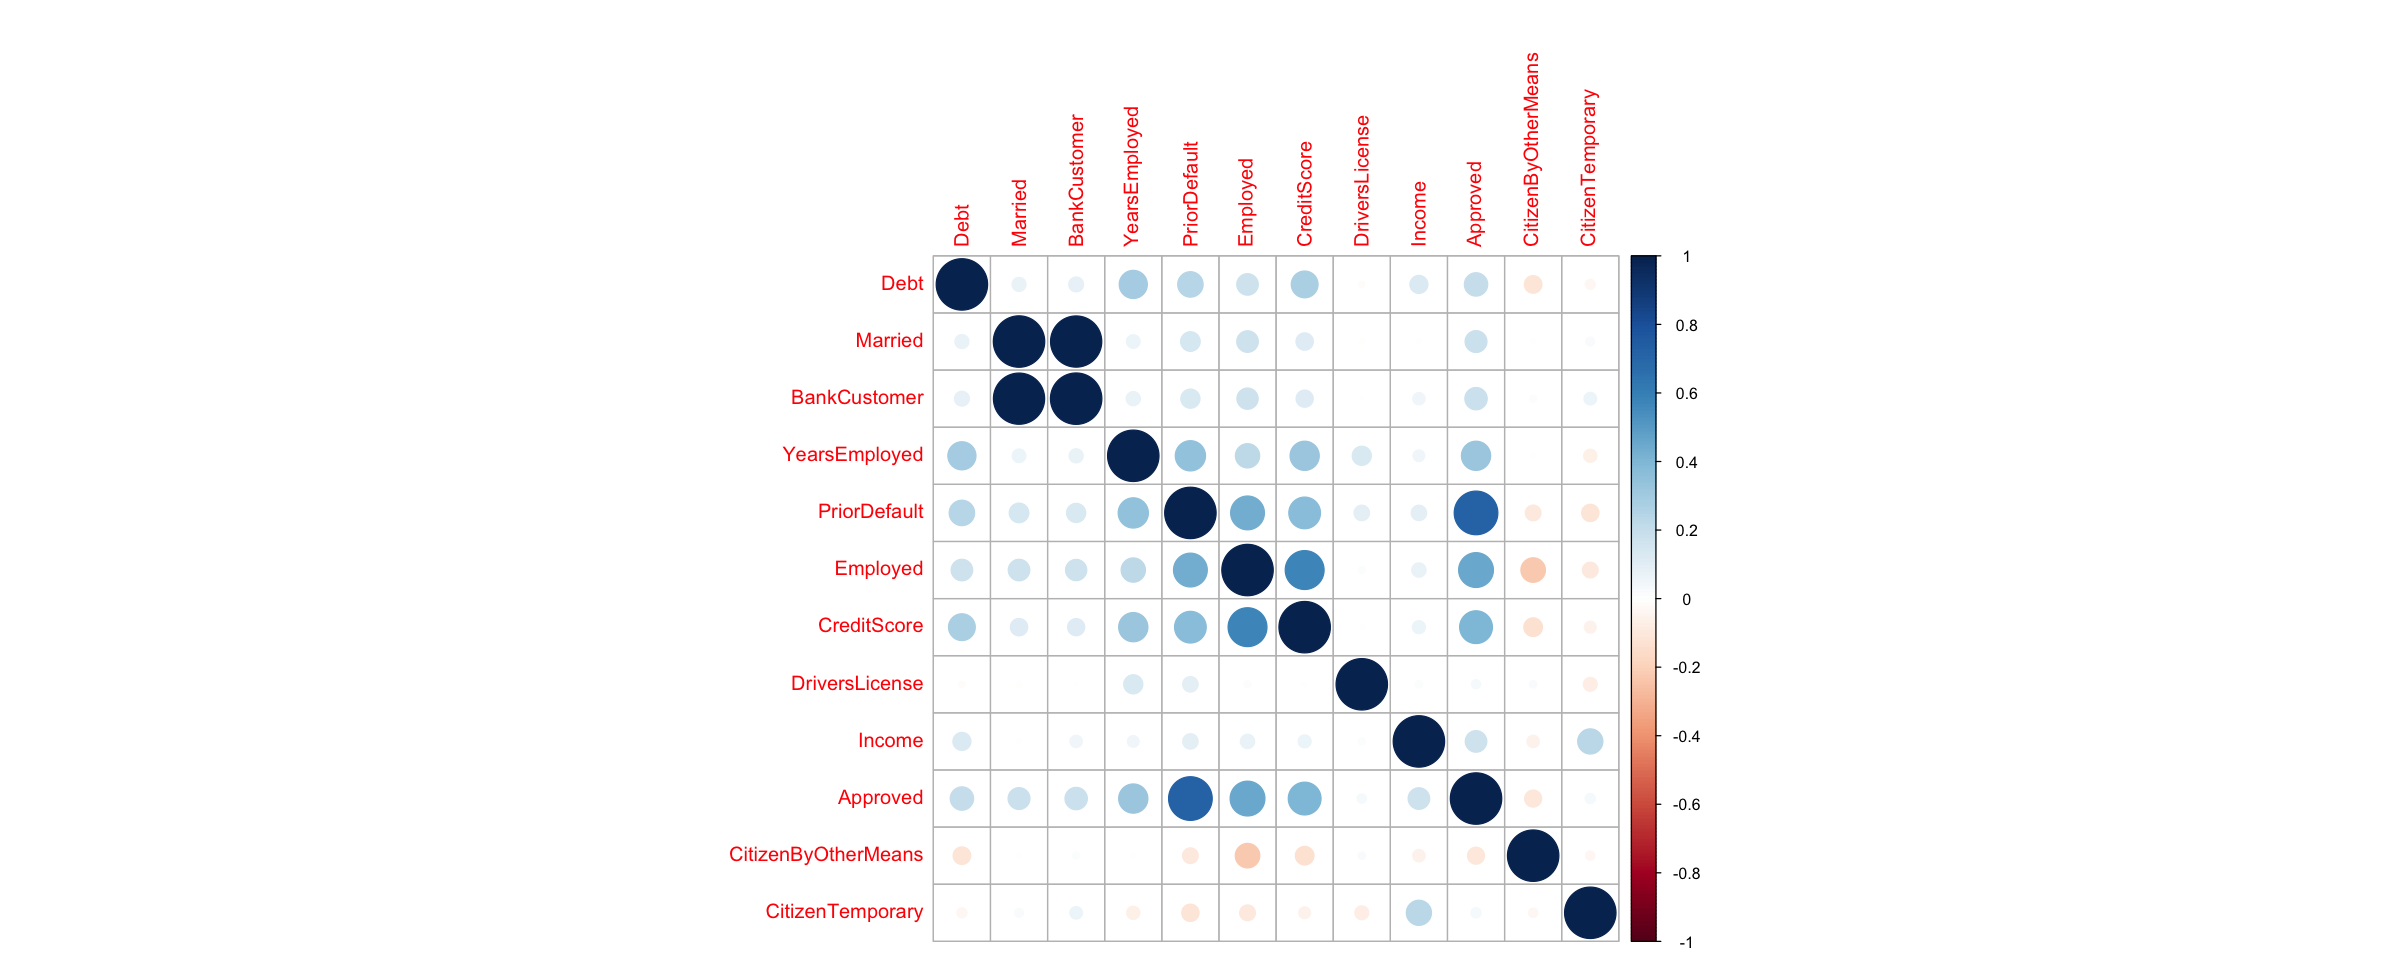

In [20]:
cor_cust <- cor(cust_dataset)
corrplot(cor_cust)

In [21]:
cor_cust

,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income,Approved,CitizenByOtherMeans,CitizenTemporary
Debt,1.00000000,0.074648785,0.08378141,0.298901558,0.24431672,0.17484594,0.271206739,-0.013023430,0.123121153,0.20629374,-0.116404245,-0.03784193
Married,0.07464878,1.000000000,0.99203313,0.069944562,0.14507317,0.17542761,0.113967757,-0.009784401,-0.006898889,0.18058320,0.007780873,0.02897889
BankCustomer,0.08378141,0.992033126,1.00000000,0.075904558,0.13853521,0.17026817,0.111076808,-0.002401800,0.057273056,0.18896447,0.018159871,0.06023394
YearsEmployed,0.29890156,0.069944562,0.07590456,1.000000000,0.34568876,0.22298177,0.322329668,0.138139381,0.051344929,0.32247536,-0.007964508,-0.06593756
PriorDefault,0.24431672,0.145073167,0.13853521,0.345688756,1.00000000,0.43203236,0.379531965,0.091275763,0.090011902,0.72040682,-0.092984909,-0.11345103
Employed,0.17484594,0.175427610,0.17026817,0.222981766,0.43203236,1.00000000,0.571498114,0.017042806,0.077651821,0.45830133,-0.227402868,-0.09359772
CreditScore,0.27120674,0.113967757,0.11107681,0.322329668,0.37953196,0.57149811,1.000000000,0.006943759,0.063692439,0.40641001,-0.130871076,-0.05349092
DriversLicense,-0.01302343,-0.009784401,-0.00240180,0.138139381,0.09127576,0.01704281,0.006943759,1.000000000,0.019201414,0.03162481,0.020030377,-0.07238173
Income,0.12312115,-0.006898889,0.05727306,0.051344929,0.09001190,0.07765182,0.063692439,0.019201414,1.000000000,0.17565720,-0.058611122,0.23887035
Approved,0.20629374,0.180583197,0.18896447,0.322475358,0.72040682,0.45830133,0.406410009,0.031624814,0.175657201,1.00000000,-0.109758317,0.03924467


**Inference**

---

Here we could see that Married and BankCustomer are unusually Correlated with each other and the both are not explaining the dependent variable Approved 

## Creating a base model with following parameters
----
 * Debt
 * Married
 * BankCustomer
 * YearsEmployed
 * PriorDefault
 * Employed
 * CreditScore
 * Income
 * CitizenByOtherMeans
 * CitizenTemporary
 
 We'll then see the significant paramters of for the model
 

In [22]:
# removing driving license from the dataset
cust_dataset <- cust_dataset %>% dplyr::select(-c(DriversLicense))

In [23]:
base_model <- glm(Approved ~., data=cust_dataset, family="binomial")
summary(base_model)


Call:
glm(formula = Approved ~ ., family = "binomial", data = cust_dataset)

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -3.988e+00  3.939e-01 -10.124  < 2e-16 ***
Debt                -8.155e-03  2.525e-02  -0.323 0.746741    
Married             -1.655e+01  6.537e+02  -0.025 0.979805    
BankCustomer         1.723e+01  6.537e+02   0.026 0.978967    
YearsEmployed        7.669e-02  4.405e-02   1.741 0.081681 .  
PriorDefault         3.630e+00  3.083e-01  11.774  < 2e-16 ***
Employed             7.813e-01  3.358e-01   2.326 0.020003 *  
CreditScore          1.007e-01  5.457e-02   1.846 0.064961 .  
Income               5.113e-04  1.492e-04   3.426 0.000612 ***
CitizenByOtherMeans -4.357e-02  4.426e-01  -0.098 0.921584    
CitizenTemporary     3.575e+00  8.273e-01   4.322 1.55e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 948.16 

## Model impovements
-----

Here we could get to see that debt is not significant at all, but financer who finance loans take Debt to income ratio as a paramter for consideration when granting a loan. Will no create a computed field to capture debt to income ratio.


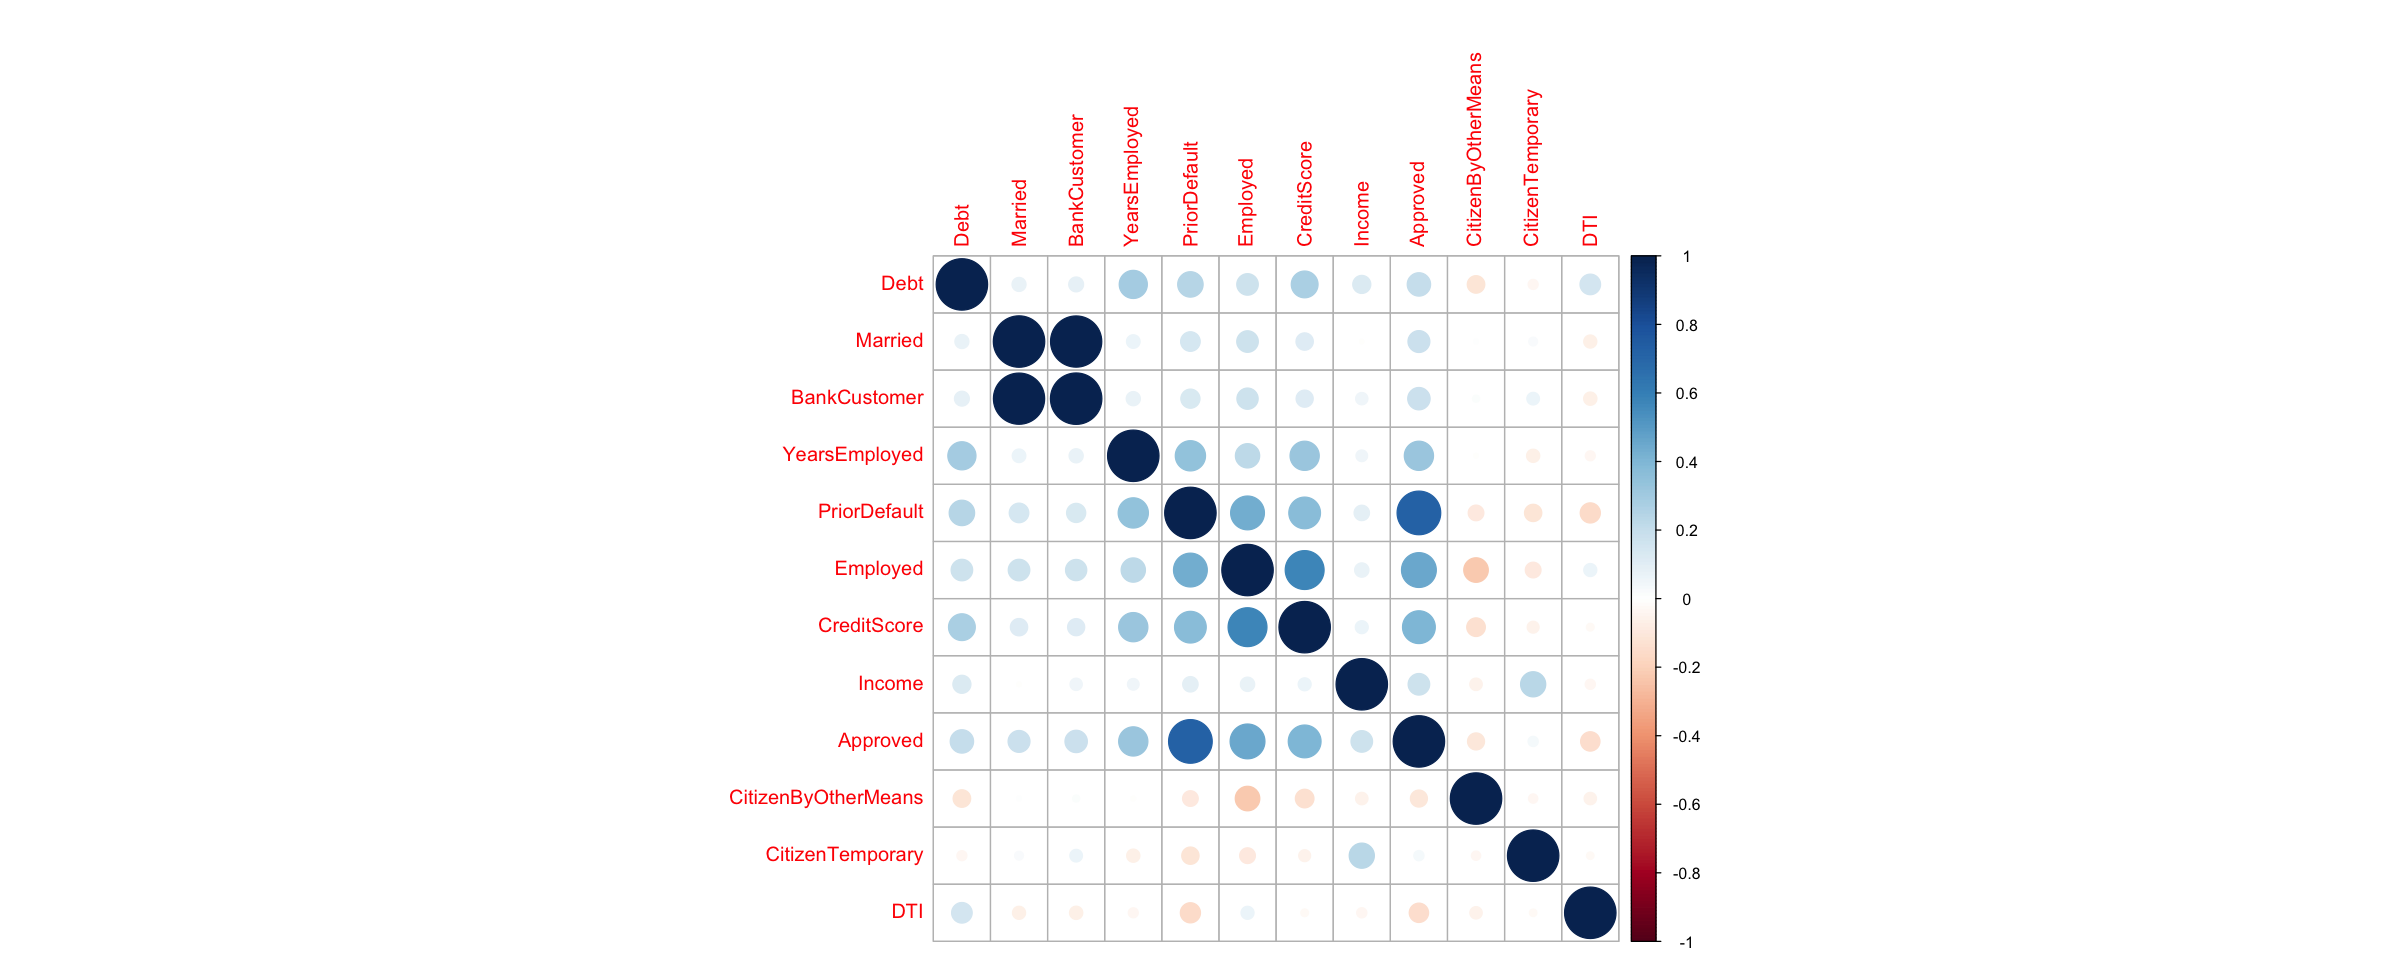

In [24]:
cust_dataset <- cust_dataset %>% mutate(DTI = Debt/Income)
# replacing infinite (divided by zero) records with NaN so we can replace it with mean later on
cust_dataset$DTI[is.infinite(cust_dataset$DTI)] <- NaN
# replacing NaNs with median
cust_dataset$DTI[is.nan(cust_dataset$DTI)] <- median(cust_dataset$DTI,na.rm = TRUE)
cor_cust <- cor(cust_dataset)
corrplot(cor_cust)

In [25]:
cor_cust

,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved,CitizenByOtherMeans,CitizenTemporary,DTI
Debt,1.00000000,0.074648785,0.08378141,0.298901558,0.24431672,0.17484594,0.27120674,0.123121153,0.20629374,-0.116404245,-0.03784193,0.15984367
Married,0.07464878,1.000000000,0.99203313,0.069944562,0.14507317,0.17542761,0.11396776,-0.006898889,0.18058320,0.007780873,0.02897889,-0.06496952
BankCustomer,0.08378141,0.992033126,1.00000000,0.075904558,0.13853521,0.17026817,0.11107681,0.057273056,0.18896447,0.018159871,0.06023394,-0.06658968
YearsEmployed,0.29890156,0.069944562,0.07590456,1.000000000,0.34568876,0.22298177,0.32232967,0.051344929,0.32247536,-0.007964508,-0.06593756,-0.03765280
PriorDefault,0.24431672,0.145073167,0.13853521,0.345688756,1.00000000,0.43203236,0.37953196,0.090011902,0.72040682,-0.092984909,-0.11345103,-0.15299472
Employed,0.17484594,0.175427610,0.17026817,0.222981766,0.43203236,1.00000000,0.57149811,0.077651821,0.45830133,-0.227402868,-0.09359772,0.06409356
CreditScore,0.27120674,0.113967757,0.11107681,0.322329668,0.37953196,0.57149811,1.00000000,0.063692439,0.40641001,-0.130871076,-0.05349092,-0.02228689
Income,0.12312115,-0.006898889,0.05727306,0.051344929,0.09001190,0.07765182,0.06369244,1.000000000,0.17565720,-0.058611122,0.23887035,-0.03907830
Approved,0.20629374,0.180583197,0.18896447,0.322475358,0.72040682,0.45830133,0.40641001,0.175657201,1.00000000,-0.109758317,0.03924467,-0.14141515
CitizenByOtherMeans,-0.11640424,0.007780873,0.01815987,-0.007964508,-0.09298491,-0.22740287,-0.13087108,-0.058611122,-0.10975832,1.000000000,-0.03250038,-0.05786809


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC for the model is: 0.935270154191579"

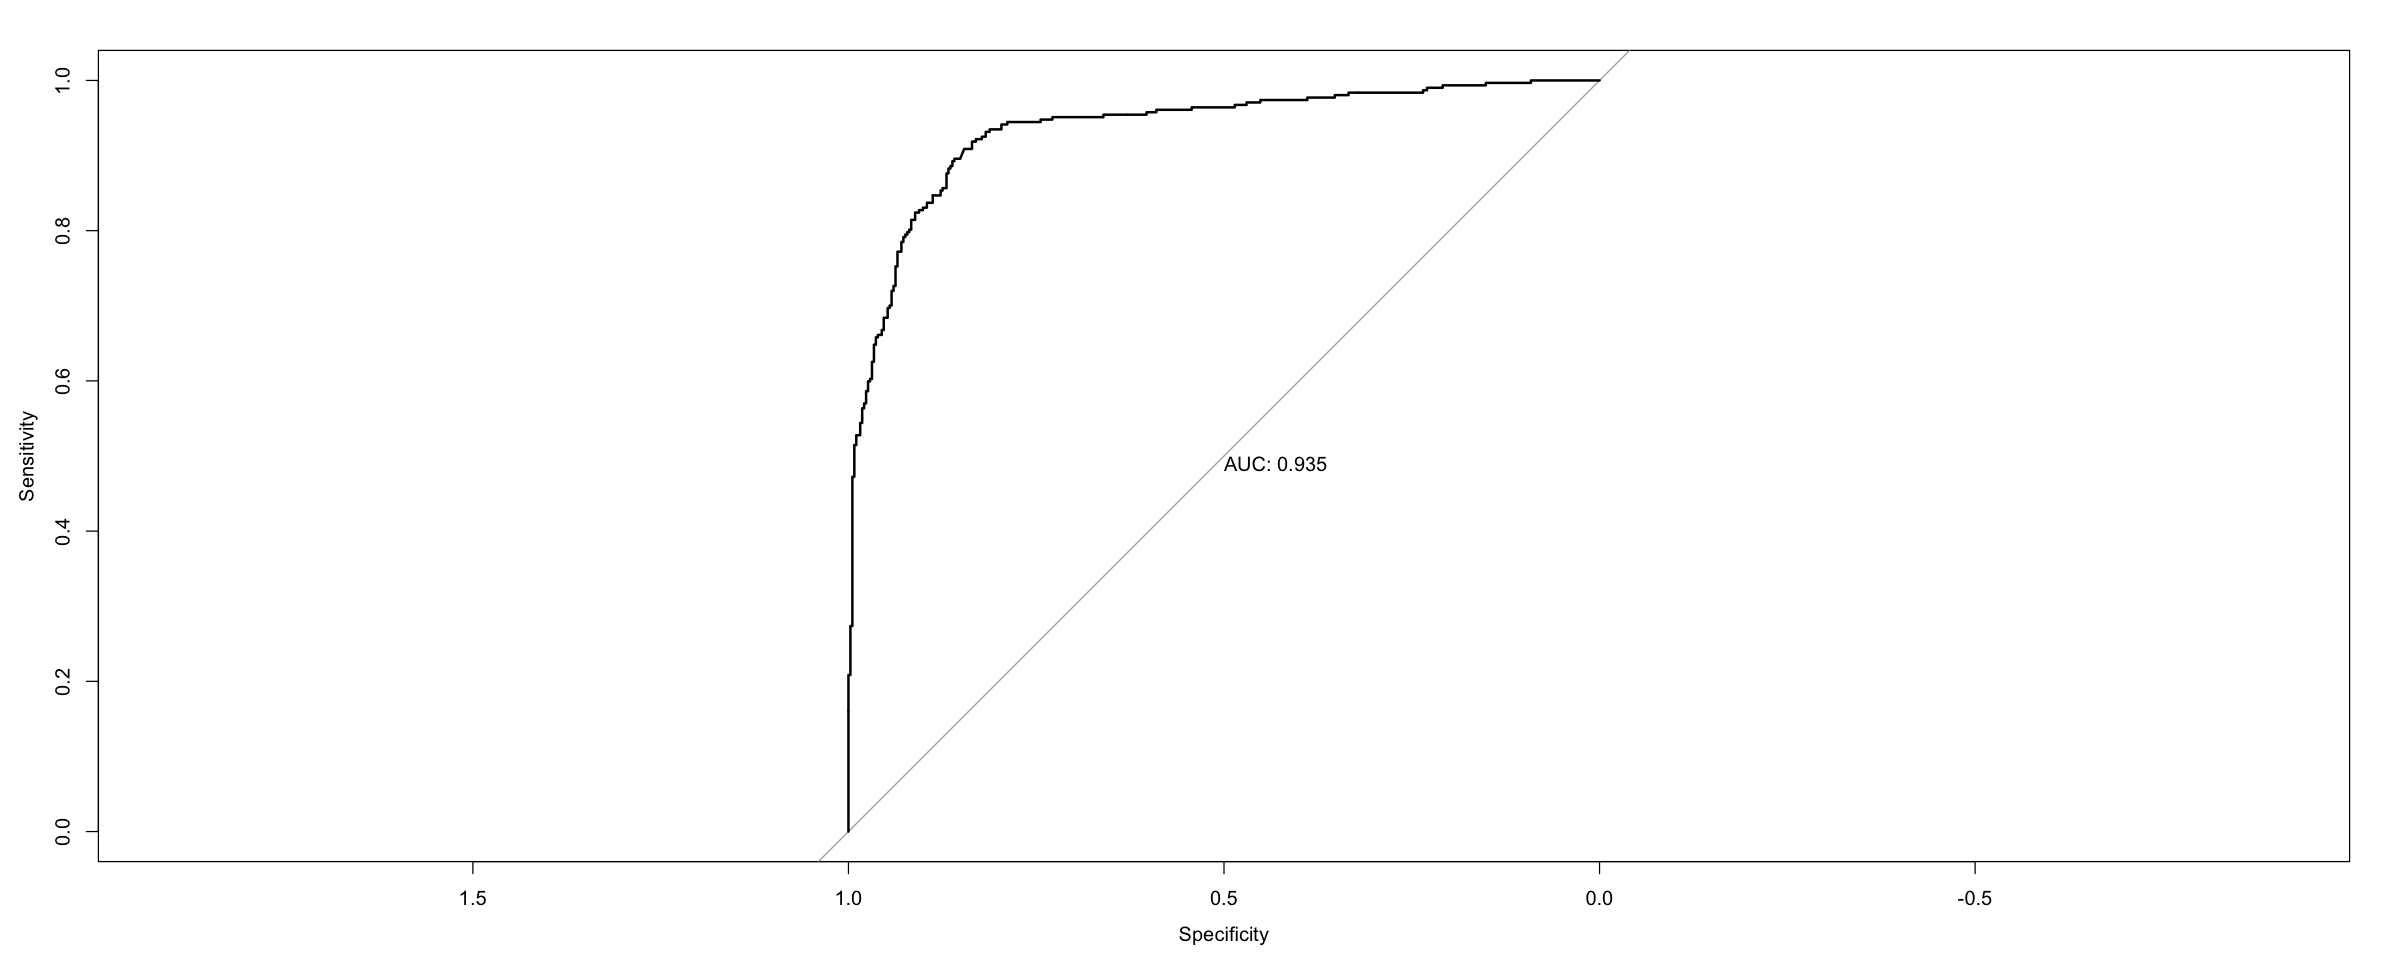

In [26]:
model <- glm(Approved ~., data=cust_dataset, family="binomial")
predictions <- predict(model, cust_dataset, type="response")
test_auc = auc(cust_dataset$Approved ~ predictions, plot = TRUE, print.auc = TRUE)
paste0("AUC for the model is: ", test_auc)

In [27]:
summary(model)


Call:
glm(formula = Approved ~ ., family = "binomial", data = cust_dataset)

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -3.865e+00  3.953e-01  -9.777  < 2e-16 ***
Debt                 1.511e-03  2.565e-02   0.059  0.95303    
Married             -1.654e+01  6.564e+02  -0.025  0.97990    
BankCustomer         1.721e+01  6.564e+02   0.026  0.97909    
YearsEmployed        7.305e-02  4.414e-02   1.655  0.09790 .  
PriorDefault         3.522e+00  3.111e-01  11.321  < 2e-16 ***
Employed             8.554e-01  3.425e-01   2.498  0.01250 *  
CreditScore          1.045e-01  5.696e-02   1.834  0.06662 .  
Income               4.587e-04  1.475e-04   3.109  0.00188 ** 
CitizenByOtherMeans -9.103e-02  4.393e-01  -0.207  0.83583    
CitizenTemporary     3.477e+00  8.267e-01   4.206  2.6e-05 ***
DTI                 -7.667e-01  3.832e-01  -2.001  0.04541 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter

## Adjusting input parameters with again based on new observations
-----

As we could see the below listed parameters are insignificant for the model, lets remove the model and run again to see the latest summary.

Removing the following from the model

* CitizenByOtherMeans
* Married
* BankCustomer

In [28]:
cust_dataset <- cust_dataset %>% dplyr::select(-c(Married, BankCustomer, CitizenByOtherMeans))

In [29]:
model <- glm(Approved ~., data=cust_dataset, family="binomial")
predictions <- predict(model, cust_dataset, type="response")
test_auc = auc(cust_dataset$Approved ~ predictions, print.auc = TRUE)
paste0("AUC for the model is: ", test_auc)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC for the model is: 0.931226133473946"

In [30]:
summary(model)


Call:
glm(formula = Approved ~ ., family = "binomial", data = cust_dataset)

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -3.3077149  0.2937055 -11.262  < 2e-16 ***
Debt              0.0007951  0.0251381   0.032  0.97477    
YearsEmployed     0.0895698  0.0439972   2.036  0.04177 *  
PriorDefault      3.4203422  0.3016017  11.341  < 2e-16 ***
Employed          0.8922288  0.3345515   2.667  0.00765 ** 
CreditScore       0.1038319  0.0568998   1.825  0.06803 .  
Income            0.0004674  0.0001451   3.221  0.00128 ** 
CitizenTemporary  3.5853747  0.8172768   4.387 1.15e-05 ***
DTI              -0.7888025  0.3768588  -2.093  0.03634 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 948.16  on 689  degrees of freedom
Residual deviance: 445.78  on 681  degrees of freedom
AIC: 463.78

Number of Fisher Scoring iterations: 7


## Removing Sensitive information from the data
----

Since Citizenship is not a necessary and ethical indicator for credit approval, lets remove that from the dataset and run the model again.
Also CreditScore seems to be insignificant, let us also remove that

In [31]:
cust_dataset <- cust_dataset %>% dplyr::select(-c(CitizenTemporary, CreditScore))

In [32]:
model <- glm(Approved ~., data=cust_dataset, family="binomial")
predictions <- predict(model, cust_dataset, type="response")
test_auc = auc(cust_dataset$Approved ~ predictions, print.auc = TRUE)
paste0("AUC for the model is: ", test_auc)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC for the model is: 0.924813532798666"

In [33]:
summary(model)


Call:
glm(formula = Approved ~ ., family = "binomial", data = cust_dataset)

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -3.1338531  0.2655797 -11.800  < 2e-16 ***
Debt          -0.0006276  0.0244677  -0.026 0.979538    
YearsEmployed  0.0915094  0.0409411   2.235 0.025407 *  
PriorDefault   3.3156189  0.2795561  11.860  < 2e-16 ***
Employed       1.2588097  0.2445474   5.148 2.64e-07 ***
Income         0.0004630  0.0001380   3.356 0.000791 ***
DTI           -0.8097514  0.3741094  -2.164 0.030428 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 948.16  on 689  degrees of freedom
Residual deviance: 467.08  on 683  degrees of freedom
AIC: 481.08

Number of Fisher Scoring iterations: 7


# Preparing the data for a deep learning model

## Scaling continuous data
---

Scaling is used for continuous variables where the range of variables could wastly vary. Scaling helps the data to be in similar scale for all the input variables and this could help fitting the model easy.

We'll scale the following parameters:

* Debt
* YearsEmployed
* Income
* DTI

In [34]:
# scaling the data
scaled_data <- cust_dataset %>% mutate(Debt = scale(Debt),
                                      YearsEmployed = scale(YearsEmployed),
                                      Income = scale(Income),
                                      DTI = scale(DTI))

# looking at the sample data
head(scaled_data, n=5)

,Debt,YearsEmployed,PriorDefault,Employed,Income,Approved,DTI
,"<dbl[,1]>","<dbl[,1]>",<int>,<int>,"<dbl[,1]>",<int>,"<dbl[,1]>"
1,-0.9559198,-0.2908716,1,1,-0.19527168,1,-0.1924496
2,-0.0600070,0.2440134,1,1,-0.08778820,1,-0.1955770
3,-0.8554811,-0.2161670,1,0,-0.03711741,1,-0.2017171
4,-0.6465687,0.4561745,1,1,-0.19469588,1,0.2261735
5,0.1740151,-0.1534151,1,0,-0.19527168,1,-0.1924496


## Creating Training and Testing Datasets


In [35]:
# setting seed
set.seed(5)

# choosing 75% of the data to be the training data
data_split <- initial_split(scaled_data, prop = .75)
# extracting training data and test data as two seperate dataframes
data_train <- training(data_split)
data_test  <- testing(data_split)

In [36]:

net.model = neuralnet(Approved ~ ., data_train, hidden = 4 , linear.output = TRUE )

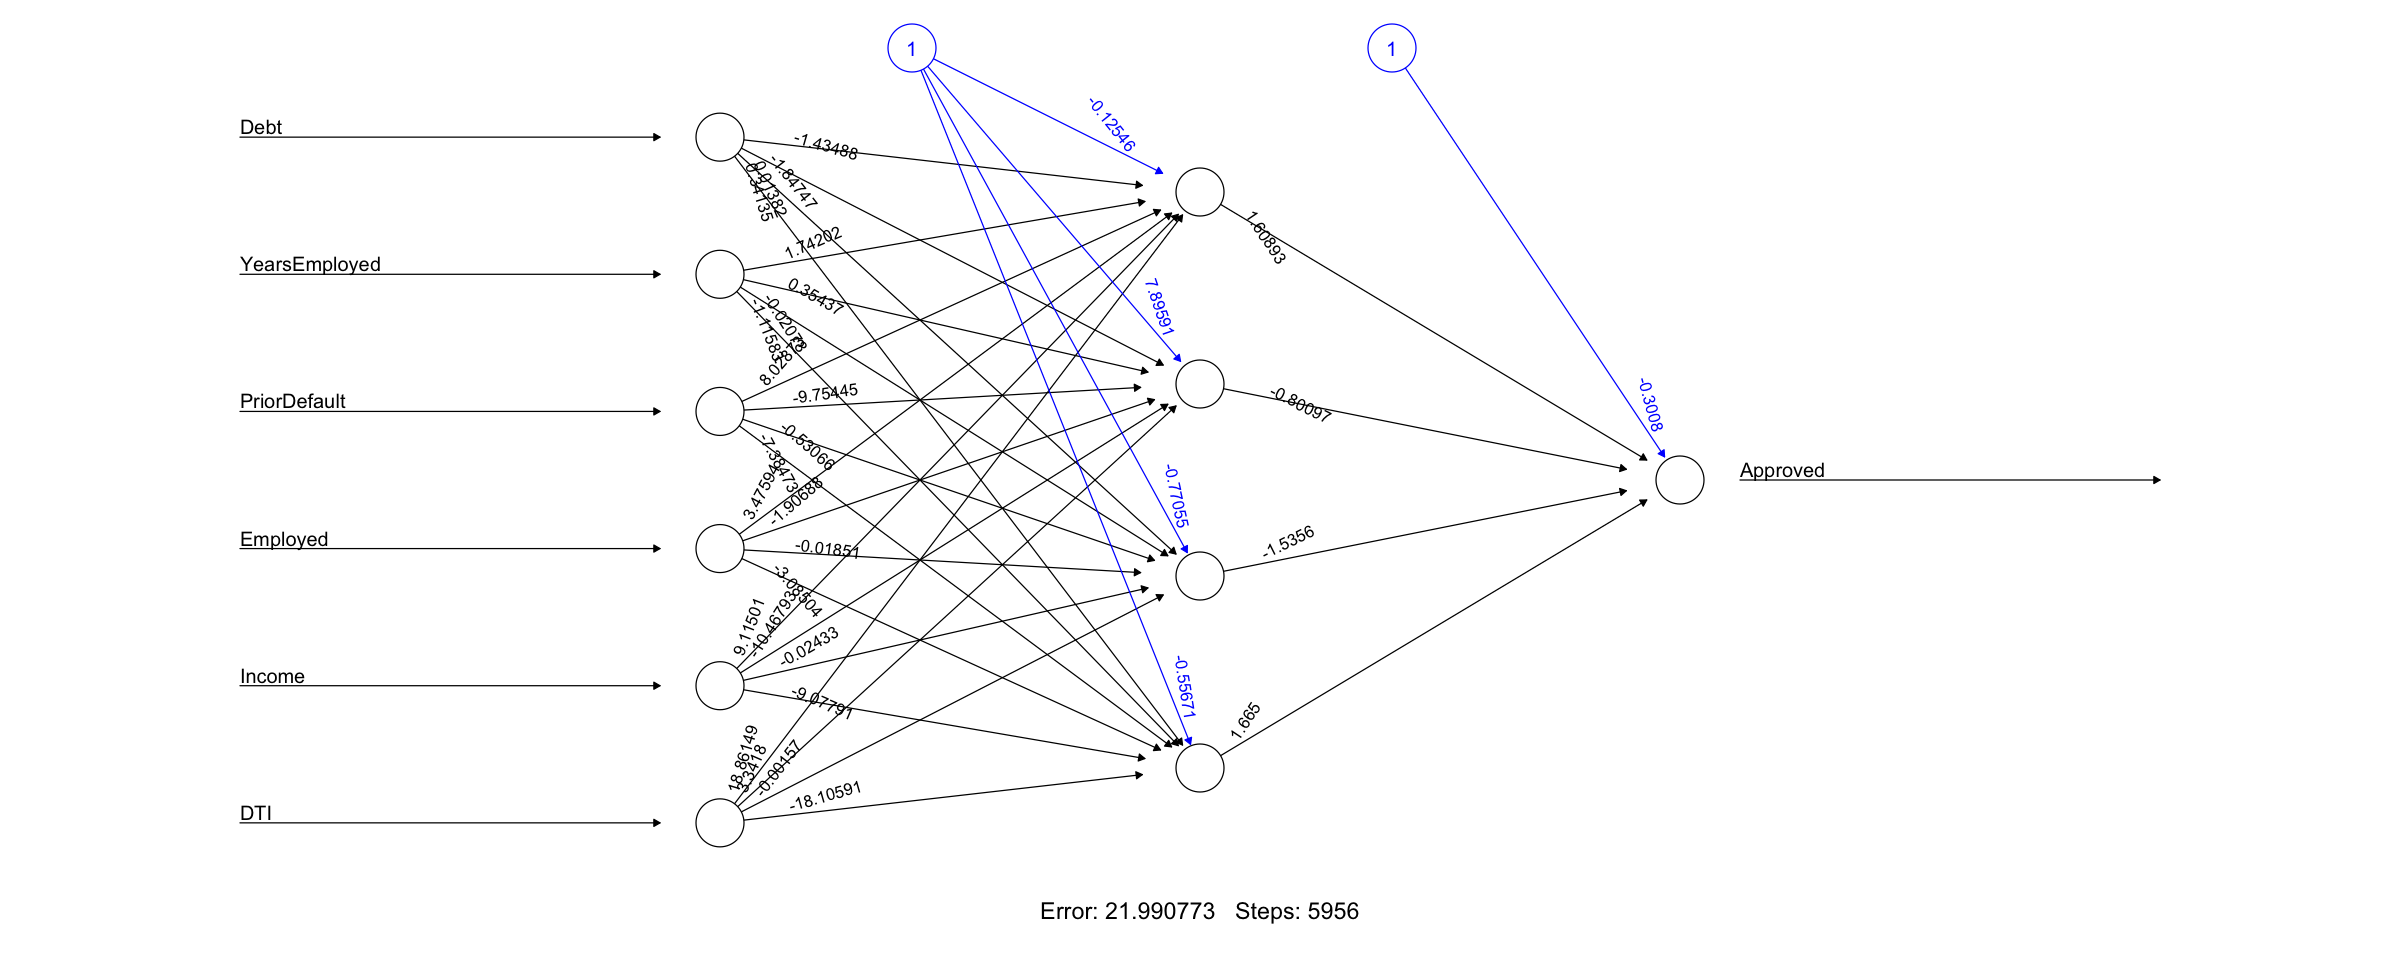

In [37]:
# plot neural network
plot(net.model, rep="best")

In [38]:
# Predictions
net.prediction <- predict(net.model, data_test)
net.predictionClass <- as.integer(ifelse(net.prediction > 0.5, 1, 0))

## Model  Performance Metrics

### ROC Curve

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC for the model is: 0.899087493290392"

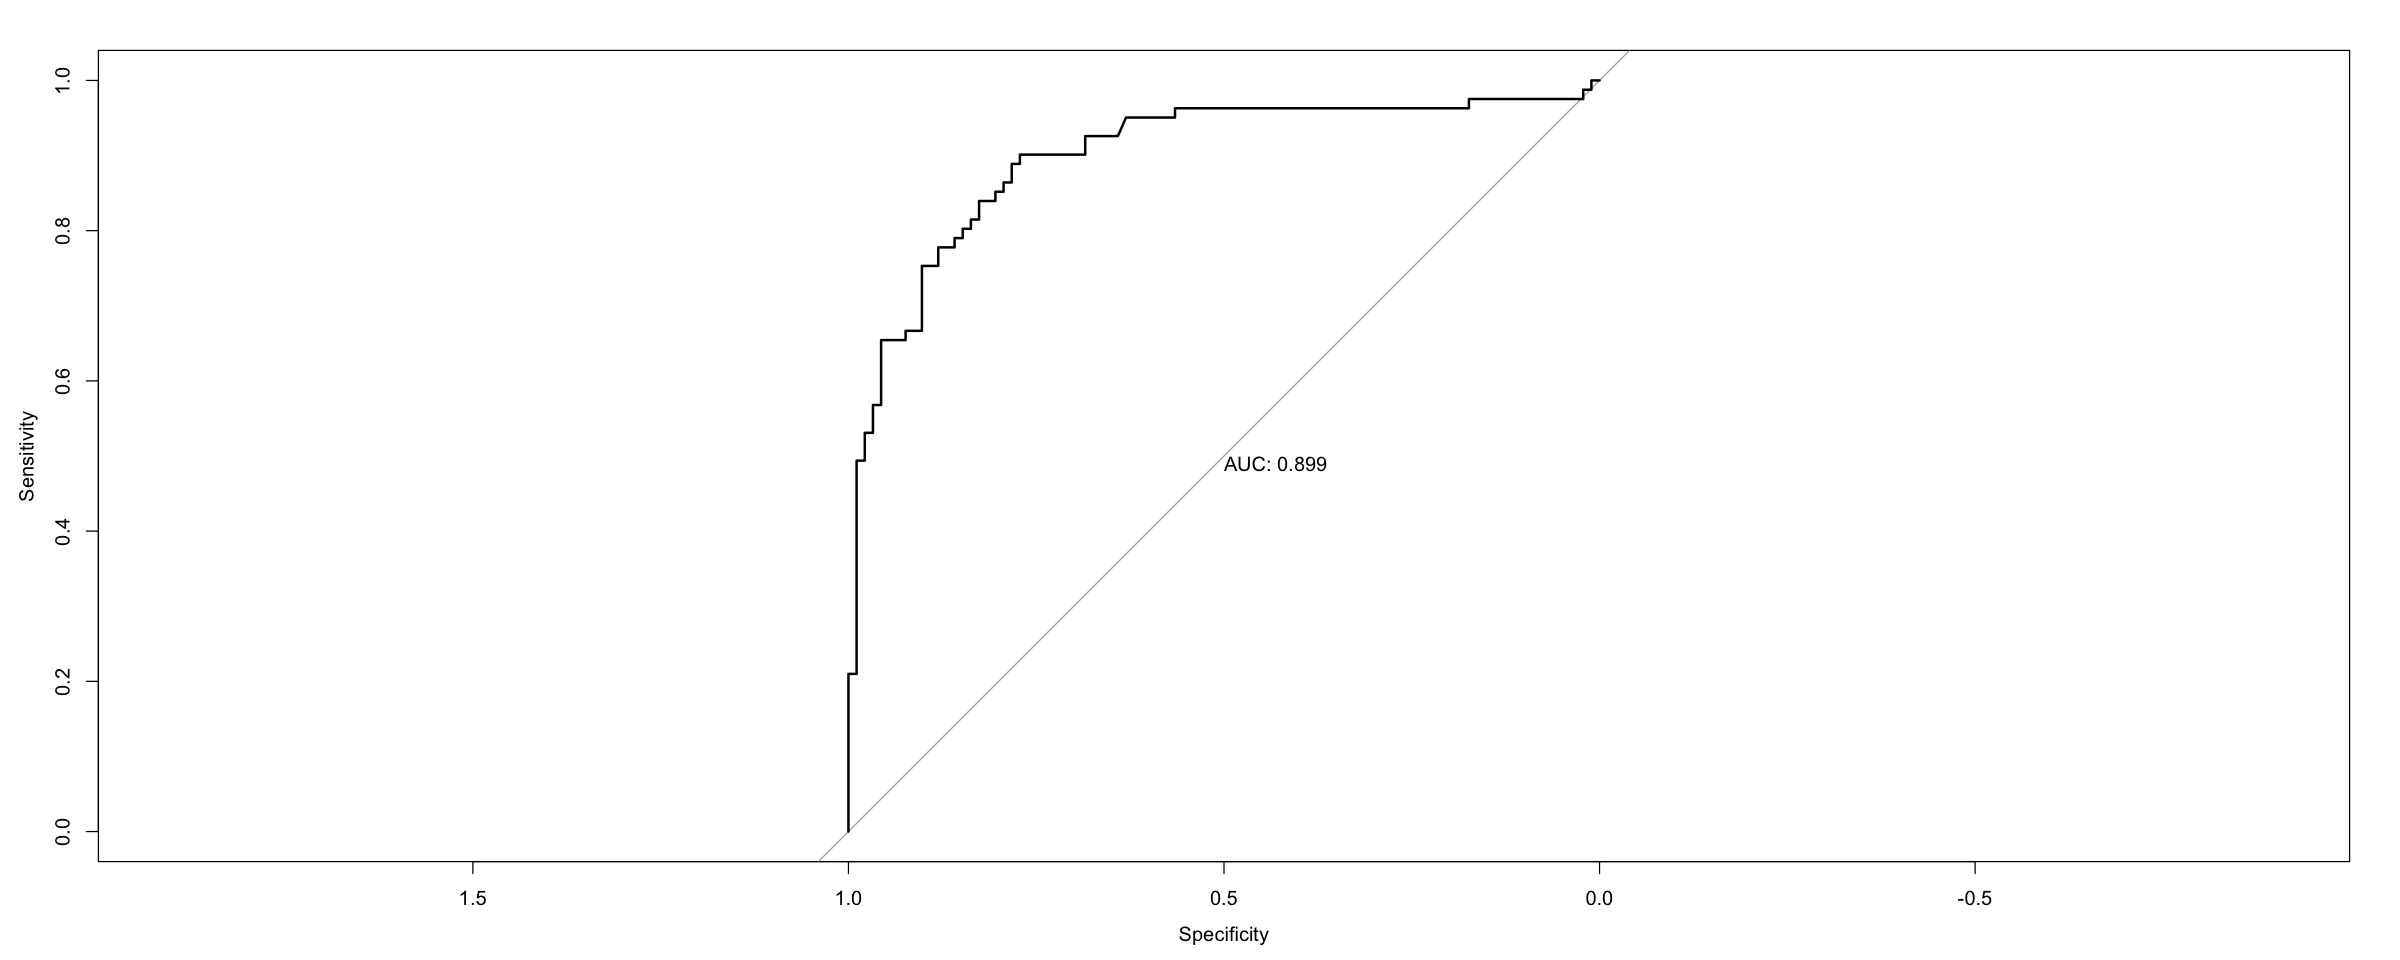

In [39]:

test_auc = auc(data_test$Approved ~ net.prediction, plot= TRUE, print.auc = TRUE)
paste0("AUC for the model is: ", test_auc)

### Confusion Matrix

In [40]:
confMatrix <- confusionMatrix(data=as.factor(net.predictionClass), reference = as.factor(data_test$Approved), positive = "1")


In [41]:
# confusion matrix
confMatrix

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 76 15
         1 16 66
                                          
               Accuracy : 0.8208          
                 95% CI : (0.7554, 0.8749)
    No Information Rate : 0.5318          
    P-Value [Acc > NIR] : 1.519e-15       
                                          
                  Kappa : 0.6404          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8148          
            Specificity : 0.8261          
         Pos Pred Value : 0.8049          
         Neg Pred Value : 0.8352          
             Prevalence : 0.4682          
         Detection Rate : 0.3815          
   Detection Prevalence : 0.4740          
      Balanced Accuracy : 0.8205          
                                          
       'Positive' Class : 1               
                                    